# Analysis of Data Breach Emails

In [20]:
! pip install PyPDF2

In [0]:
import os
import numpy as np
import sklearn
# import gensim
import nltk
import xgboost
import pandas as pd
import tensorflow as tf
import dask_ml.joblib
from sklearn.externals import joblib

Most promising search critieria:
- Evidence of phishing attacks
- Unnecessary Data Exposure

The following cells are for text analysis of the email data. The first objective should be the tokenization of the words. Next should come the data exploration.

If you need help with ideas, Notebooks on Kaggle.com, and Github.com can possibly be useful resources for ideas

In [39]:
# Test of Reading PDF
import requests
import PyPDF2

url = "https://oag.ca.gov/system/files/LYFE%20Kitchen%20Notice%20of%20Data%20Breach_0.pdf"
response = requests.get(url)
with open('document.pdf', 'wb') as fw:
    fw.write(response.content)

pdf_file = open('document.pdf', 'rb')
read_pdf = PyPDF2.PdfFileReader(pdf_file)
number_of_pages = read_pdf.getNumPages()
page = read_pdf.getPage(0)
page_content = page.extractText()
#print(response.content)
print(page_content.encode('utf-8').decode('utf-8'))

35816774v1 
NOTICE OF DATA BREACH 
LYFE Kitchen values the relationships that we have with our customers and recognizes how important the 
security of your payment card information is. For these reasons, we want to inform you that LYFE Kitchen has been 
the victim of a data breach that may involve your payment card information.  
I.
What Happened? 
LYFE Kitchen was notified by its third-party point of sale (ﬁPOSﬂ) vendor that the vendor™s computer 
network potentially had been compromised by a malware data breach.  The malware was programmed to access data 
from the magnetic stripe of payment cards at the time they were swiped.  The magnetic stripe contains only the card 
number, expiration date and verification code.  No other customer information was involved. Based on our third-party 
IT security expert™s investigation, the malware could have affected the POS equipment at two (2) LYFE Kitchen 
corporate restaurants in California, two (2) corporate restaurants in Tennessee, and one (

Large-scale text extraction and placement in Pandas Dataframe

In [0]:
californiaList = ['https://oag.ca.gov/system/files/CA%20Letter_City%20of%20Thousand%20Oaks_0.pdf',
'https://oag.ca.gov/system/files/ALP-AisforApple_Sample_Notice_04-03-18_1.pdf',
'https://oag.ca.gov/system/files/TEMPLATE_Santa_Cruz_Biotechnology_Consumer_Notification__Mar__30__2018__0.pdf',
'https://oag.ca.gov/system/files/CA%20customer%20notification%20letter%20-%20final_0.pdf',
'https://oag.ca.gov/system/files/CA%20Letter_0.pdf',
'https://oag.ca.gov/system/files/Sample%20Letters%20to%20California%20Residents_0.pdf',
'https://oag.ca.gov/system/files/MyFitnessPal%20Notice%20and%20Website%20FAQs_0.pdf',
'https://oag.ca.gov/system/files/M%26H%20notification_0.pdf',
'https://oag.ca.gov/system/files/Usinger%20Model%20Form%20of%20Notice%20of%20Data%20Breach%20Letter_1.pdf',
'https://oag.ca.gov/system/files/ADULT%20Letter_EE_Contractor_Dependent_Beneficiary_vFinal_0.pdf',
'https://oag.ca.gov/system/files/CORR%20A.%20Schlidt%20Letter%20to%20CA%20AG%20Data%20Incident%20Notification_0.pdf',
'https://oag.ca.gov/system/files/-%20Manduka%20Ad%20%28Non-Mass%29_0.pdf',
'https://oag.ca.gov/system/files/Prudential%20template%20%28CA-63518%29_0.pdf',
'https://oag.ca.gov/system/files/Supreme%20Corporation%20Notice%20Letter%20-%20CA_0.pdf',
'https://oag.ca.gov/system/files/Branton%20Notice_0.pdf',
'https://oag.ca.gov/system/files/Sample%20of%20Notification_0.pdf',
'https://oag.ca.gov/system/files/SOS001%20Letter%20of%20Security%20Data%20Breach_0.pdf',
'https://oag.ca.gov/system/files/Orbitz%20Sample%20Individual%20Notification_1.pdf',
'https://oag.ca.gov/system/files/CareMeridian%20LLC%20-%20Notice%20of%20Data%20Event%20-%20Exhibit%201%20-%20CA_0.PDF',
'https://oag.ca.gov/system/files/Bronson%20Nutritionals%20-%20Template%20Individual%20Notification%20Letter%20%28U.S.%20Residents%29_0.pdf',
'https://oag.ca.gov/system/files/CA%20Account%20Holder%20Notification%20v1_0.pdf',
'https://oag.ca.gov/system/files/Taylor-Dunn_CA_Notice_Sample_0.pdf',
'https://oag.ca.gov/system/files/sample-notification-1_25.pdf',
'https://oag.ca.gov/system/files/Adult%20CM%20Notice_0.pdf',
'https://oag.ca.gov/system/files/Sample%20Notice_22.pdf',
'https://oag.ca.gov/system/files/Notification_0.pdf',
'https://oag.ca.gov/system/files/MJF%20--%20Notice%20for%20Harborside%20Mailing%20-%20All%20Exhibits_0.pdf',
'https://oag.ca.gov/system/files/Ventiv-Notice-Keenan.Provider.CA_.02.14.2018_SAS_PROOF_1.pdf',
'https://oag.ca.gov/system/files/California%20Notice%20Samples_0.pdf',
'https://oag.ca.gov/system/files/CCA%20-%20Regulator%20Notice%20-%20CA%20-%20FINAL_0.pdf',
'https://oag.ca.gov/system/files/US%20Notice_0.pdf',
'https://oag.ca.gov/system/files/North%2040-%20California%20Form%20Exhibit%201_0.pdf',
'https://oag.ca.gov/system/files/TEMPLATE_Santa_Cruz_Biotechnology_Consumer_Notification_Letter_0.pdf',
'https://oag.ca.gov/system/files/Solera%20Holdings_0.pdf',
'https://oag.ca.gov/system/files/LA%20Philharmonic%20-%20Notice%20of%20Data%20Event%20-%20CA%20-%20Ex%201_0.pdf',
'https://oag.ca.gov/system/files/221725%20Red%20Hawk%20Casino%20-%20Individual%20Letter_1.pdf',
'https://oag.ca.gov/system/files/White%20and%20Bright%20Dental%20-%20Breach%20Notification%20Letter%20021618_0.pdf',
'https://oag.ca.gov/system/files/Sample%20Notice_21.pdf',
'https://oag.ca.gov/system/files/CDFW%20Breach%20Notification-Final_0.pdf',
'https://oag.ca.gov/system/files/Driscoll%27s%20-%20Notice%20of%20Data%20Event%20-%20CA%20-%20Exhibit%201_0.pdf',
'https://oag.ca.gov/system/files/Sample%20Notification-PDF_0.pdf',
'https://oag.ca.gov/system/files/Sample%20Letters%20-%20General_0.pdf',
'https://oag.ca.gov/system/files/T927_v01.pdf_Prescription_0.pdf',
'https://oag.ca.gov/system/files/Sample_Notice_0.PDF',
'https://oag.ca.gov/system/files/Notification%20Letter%20-%20%20Nevro_0.pdf',
'https://oag.ca.gov/system/files/National%20Stores-Consumer%20Notification%20Letter_0.pdf',
'https://oag.ca.gov/system/files/California%20Template%20Notification%20%28152381521_1%29_0.PDF',
'https://oag.ca.gov/system/files/Rosewood%20-%20California%20Notification%20Materials_0.pdf',
'https://oag.ca.gov/system/files/Corovan%20-%20CA%20Exhibit%201_0.pdf',
'https://oag.ca.gov/system/files/Employer%20Leasing%20-%20CA%20Exhibit%201_0.pdf',
'https://oag.ca.gov/system/files/Sample%20Notice_20.pdf',
'https://oag.ca.gov/system/files/PFR%20Standard%20Notification%20Letter%20Sample%201_0.pdf',
'https://oag.ca.gov/system/files/Guaranteed%20Rate%20-%20Notice%20of%20Data%20Event%20-%20CA%20-%20Exhibit%201_0.pdf',
'https://oag.ca.gov/system/files/Pedes%20Adult%20CA%20Notice_0.pdf',
'https://oag.ca.gov/system/files/California%20OAG%20-%20Notice%20of%20a%20Data%20Security%20Breach%20dated%201-11-2018_0.pdf',
'https://oag.ca.gov/system/files/TTF%20Adult%20SSN%20and%20or%20DL%20Notice%20Template_0.pdf',
'https://oag.ca.gov/system/files/Notice%20of%20Breach_0.pdf',
'https://oag.ca.gov/system/files/FlagShip%20Data%20Breach%20Notification%20Letter%20January%202018_0.pdf',
'https://oag.ca.gov/system/files/Rea.deeming%20Beauty%20-%20Notice%20of%20Data%20Event%20-%20CA%20-%20Exhibit%201_0.pdf',
'https://oag.ca.gov/system/files/US%20-%20General%20Letters_0.pdf',
'https://oag.ca.gov/system/files/Forever%2021%20CA%20Substitute%20Notice%2012.28.17_0.pdf',
'https://oag.ca.gov/system/files/West%20LA%20breach-%20Adult%20PDF_0.pdf',
'https://oag.ca.gov/system/files/NextGen%20Global%20Resources%20Breach%20Notice%204815-8586-3255%20v.2_0.pdf',
'https://oag.ca.gov/system/files/SAY%20San%20Diego%20Ad%20r4fin_0.pdf',
'https://oag.ca.gov/system/files/SVSP%20-%20Signed%20Privacy%20Breach%20Letter_0.pdf',
'https://oag.ca.gov/system/files/RootsWeb%20Breach%20Notice%20_%20Combined%20_0.pdf',
'https://oag.ca.gov/system/files/GSB%20PIF%20Notification%20Letter_20%20December%202017%20-%20jl%20signature_0.pdf',
'https://oag.ca.gov/system/files/TIO%20notice_0.pdf',
'https://oag.ca.gov/system/files/Notice%20Letter_0.pdf',
'https://oag.ca.gov/system/files/V%26F%20notice%20letters_0.pdf',
'https://oag.ca.gov/system/files/CHLA.Letter.Child__0.pdf',
'https://oag.ca.gov/system/files/Golden%20Optometric%20-%20Individual%20Notice%20%28Privileged%20%26%20Confidential%29_1.pdf',
'https://oag.ca.gov/system/files/Golden%20Optometric%20-%20Individual%20Notice%20%28Privileged%20%26%20Confidential%29_0.pdf',
'https://oag.ca.gov/system/files/2017.12.08%20Pinterest%20User%20Notice_0.pdf',
'https://oag.ca.gov/system/files/sample-notification_11.pdf',
'https://oag.ca.gov/system/files/COSDataBreach12-13-17_0.pdf',
'https://oag.ca.gov/system/files/CA%20Notification%20Letter%20%2810721%29_0.pdf',
'https://oag.ca.gov/system/files/CA.UHaulNotification-withcard.12.11.2017_0.pdf',
'https://oag.ca.gov/system/files/WEI%20Mortgage%20-%20Notice%20only%200_0.pdf',
'https://oag.ca.gov/system/files/NCPC%20Exhibit%201%20to%20CA%20Regulator%20Notice_0.pdf',
'https://oag.ca.gov/system/files/Notification%20Letter%20-%20%20Draft_12-4-17_0.pdf',
'https://oag.ca.gov/system/files/Kaiser%20Permanente%20breach%20notification%20letter_Fontana%20incident_120517_0.pdf',
'https://oag.ca.gov/system/files/HNP%20Notification%20Letters_0.pdf',
'https://oag.ca.gov/system/files/JAM%20Notification%20Letter%20CA%206.15.16%20-%2011.6.17%20Template_0.PDF',
'https://oag.ca.gov/system/files/Humboldt%20-%20FINAL%20PROOF%20-%20CA%20SSN%20%5Bredacted%5D%20%287101397x7AB84%29_0.pdf',
'https://oag.ca.gov/system/files/Stanford%20Notification%20Letter_FINAL_11292017_0.pdf',
'https://oag.ca.gov/system/files/Combat%20-%20Notice%20only_0_0.pdf',
'https://oag.ca.gov/system/files/BP3%20first-time%20recipient%20CA%20notification%20letter%20sample_0.pdf',
'https://oag.ca.gov/system/files/Email%20for%20Impacted%20Users%20from%202014%20Data%20Breach_0.pdf',
'https://oag.ca.gov/system/files/Sample%20Notice_0.PDF',
'https://oag.ca.gov/system/files/DataBreachNotification_0.pdf',
'https://oag.ca.gov/system/files/sample-notification_10.pdf',
'https://oag.ca.gov/system/files/USA%20Hoist%20-%20Data%20Security%20Breach%20Notification%20Form_0.pdf',
'https://oag.ca.gov/system/files/T425_v01%20-%20CA%20Notice_0.pdf',
'https://oag.ca.gov/system/files/TEMPLATE%20Notice%20to%20Employees%20%28All%20except%20Mass%20Oregon%29_0.pdf',
'https://oag.ca.gov/system/files/SFDOCS01-%231811613-v1-ClubSport---Notice-to-Employees-Final_0.pdf',
'https://oag.ca.gov/system/files/Cheddars%20Notification%20Letter_0.pdf',
'https://oag.ca.gov/system/files/Far%20Niente%20CA%20notification_0.pdf',
'https://oag.ca.gov/system/files/CafeMom%20Email%2011-6-17_0.pdf',
'https://oag.ca.gov/system/files/ABM%20-%20Notice%20only%200_0.pdf',
'https://oag.ca.gov/system/files/Employee%20Letter%20regarding%20Data%20Breach_0.pdf',
'https://oag.ca.gov/system/files/NOTICE%20OF%20DATA%20BREACH%20LETTER%20-%20LACDMH_0.pdf',
'https://oag.ca.gov/system/files/GNAC%20-%20Notice%20only%20-%20Exhibit%201%20-%20CA_0_0.pdf',
'https://oag.ca.gov/system/files/Dignity%20Health%20sample%20notice%20ESS%20Incident%20Individual%20Notif%20Template_0.pdf',
'https://oag.ca.gov/system/files/Data%20Breach%20notification%20%2010-17-17_0.pdf',
'https://oag.ca.gov/system/files/Corovan%20-%20notice%20onlyL_0_0.pdf',
'https://oag.ca.gov/system/files/Form%20of%20Notice%20Letter%20Regarding%20Breach_0.pdf',
'https://oag.ca.gov/system/files/Tween%20Brands%20Notification%20CA1%20and%20CA2_0.pdf',
'https://oag.ca.gov/system/files/HumanGood%20-%20letter%20to%20California%20AG_0.pdf',
'https://oag.ca.gov/system/files/Kimberly-Clark%20Cyber%20Event%20Letter%20-%20Oct%202017%20-%20US_0.pdf',
'https://oag.ca.gov/system/files/Notice%20Letter-Redact-general_0.pdf',
'https://oag.ca.gov/system/files/CHJ%20Notification%20Letter%20FINAL_0.pdf',
'https://oag.ca.gov/system/files/SoCal%20Soft%20Drinks%20Notification%20Letter_0.pdf',
'https://oag.ca.gov/system/files/Alliance_for_College_Ready_Public_Schools_-_AG_Notice__0.PDF',
'https://oag.ca.gov/system/files/Palomar%20patient%20notification%20letter%20102017_0.pdf',
'https://oag.ca.gov/system/files/sample-notification_8.pdf',
'https://oag.ca.gov/system/files/Spark%20Pay%20Online%20Store_End-Customer%20Notice%20of%20Data%20Breach_10-16-2017%20version_0.pdf',
'https://oag.ca.gov/system/files/Sample%20Customer%20Notice%20%28General%29_0.pdf',
'https://oag.ca.gov/system/files/Individual%20Notice%20Letter_0.pdf',
'https://oag.ca.gov/system/files/CA%20Notice%20ltr_0.pdf',
'https://oag.ca.gov/system/files/Breach%20Letter%20-%20Clean09132017_0.pdf',
'https://oag.ca.gov/system/files/DROEGE%20redacted_0.pdf',
'https://oag.ca.gov/system/files/T126_v03%20-%20Hue%20General%20Notice%20%283%29_0.pdf',
'https://oag.ca.gov/system/files/Provo%20Craft%20Consumer%20Notification%20Letter_2.pdf',
'https://oag.ca.gov/system/files/Catholic%20United%20Financial%20Template%20Consumer%20Notice_0.pdf',
'https://oag.ca.gov/system/files/Tommie%20Copper%20-%20Notice%20of%20Data%20Event%20-%20CA%20-%20Exhibit%201_0.pdf',
'https://oag.ca.gov/system/files/SyncHR%20Breach%20-%20Sample%20Notification%20Ltr%20%28CA%29_0.pdf',
'https://oag.ca.gov/system/files/Sub%20Notice%2010-4%20FINAL_0.pdf',
'https://oag.ca.gov/system/files/Avanti%20%28update%29_0.pdf',
'https://oag.ca.gov/system/files/CA%20Cabrillo%20attach_0.pdf',
'https://oag.ca.gov/system/files/FlexShopper%20-%20AG%20Notice%20-%20CA_0.pdf',
'https://oag.ca.gov/system/files/%20Sample%20Client%20Notification%20Letter_0.pdf',
'https://oag.ca.gov/system/files/Combined%20CA_0.pdf',
'https://oag.ca.gov/system/files/Fresno%203%20Ad%20Employee%20with%20Minor%20r6fin_0.pdf',
'https://oag.ca.gov/system/files/Grainger%20Notification_%20SAMPLE_0.pdf',
'https://oag.ca.gov/system/files/Signator%20-%20Breach%20Notification%20Letter%20Template_0.pdf',
'https://oag.ca.gov/system/files/Adult%20CA_0.pdf',
'https://oag.ca.gov/system/files/Bulletproof%20Notice_0.PDF',
'https://oag.ca.gov/system/files/E%20%26%20J%20Gallo%20Winery%20%20Consumer%20Notification%20Letter_0.pdf',
'https://oag.ca.gov/system/files/International%20Council%20of%20Shopping%20Centers%20Ad%20CA_0.pdf',
'https://oag.ca.gov/system/files/ABB%20Sample%20Notification%20Letter%20to%20Individuals_0.pdf',
'https://oag.ca.gov/system/files/CHS%20Notification_0.pdf',
'https://oag.ca.gov/system/files/CA%20Notice_3.pdf',
'https://oag.ca.gov/system/files/Equifax%20notice%20only_0.pdf',
'https://oag.ca.gov/system/files/SRI%20International%20-%20General%20Notice_0.pdf',
'https://oag.ca.gov/system/files/California%20notice_0.pdf',
'https://oag.ca.gov/system/files/Notice%20of%20Data%20Breach%20%28Final%209-6-17%29_0.pdf',
'https://oag.ca.gov/system/files/CMHS%20Breach%20Notice%20to%20CA%20AG_0.pdf',
'https://oag.ca.gov/system/files/201708281102_0.pdf',
'https://oag.ca.gov/system/files/HRS%20Notification_0.pdf',
'https://oag.ca.gov/system/files/Akira%20-%20Notice%20of%20Data%20Event%20-%20CA%20-%20Exhibit%201_0.pdf',
'https://oag.ca.gov/system/files/Breach%20Notification%20Letter.Final_._0.pdf',
'https://oag.ca.gov/system/files/Breach%20Notification%20Template_0.pdf',
'https://oag.ca.gov/system/files/Carter%20Notice_1.pdf',
'https://oag.ca.gov/system/files/Sample%20Individual%20Notification%20Letter_0.pdf',
'https://oag.ca.gov/system/files/CA%20CLCR%20Cnsmr%20Notification%20Lttr%20-%20AllClearID%20Identity%20Protection%20Service_0.pdf',
'https://oag.ca.gov/system/files/DRAFT%20-%20General%20Client%20notification_0.pdf',
'https://oag.ca.gov/system/files/IHR%20SABRE%20GENERAL%20NOTIFICATION%20ROOSEVELT%20PDF%20%28J2261079x7AD79%29_0.pdf',
'https://oag.ca.gov/system/files/IHR%20SABRE%20GENERAL%20NOTIFICATION%20BICYCLE%20PDF%20%28J2261063x7AD79%29_0.pdf',
'https://oag.ca.gov/system/files/IHR%20SABRE%20GENERAL%20NOTIFICATION%20DOMAIN%20PDF%20%28J2261060x7AD79%29_0.pdf',
'https://oag.ca.gov/system/files/Zazzle%20-%20Individual%20Notice%20-%20CA_20170825_0.pdf',
'https://oag.ca.gov/system/files/Zymo%20Research%20Ad%20CA-WY%20r4fin_0.pdf',
'https://oag.ca.gov/system/files/Noto%20Final%20letter_0.pdf',
'https://oag.ca.gov/system/files/OPP%20Redacted%20Letter_0.pdf',
'https://oag.ca.gov/system/files/Aimbridge%20II%20-Notice%20Only%20%20_0_0.pdf',
'https://oag.ca.gov/system/files/Notice%20of%20Data%20Breach%20080917_1.pdf',
'https://oag.ca.gov/system/files/Dutch%20-%20Notice%20only-%20CA%20-%20Exhibit%201_0_0.pdf',
'https://oag.ca.gov/system/files/5789_Native%20Footwear_Notice_US_0.pdf',
'https://oag.ca.gov/system/files/Sabre%20Customer%20Letter%20-%20Revised_0.pdf',
'https://oag.ca.gov/system/files/Sample%20Notice_19.pdf',
'https://oag.ca.gov/system/files/Sample%20Performant%20Notice%20to%20Individuals%20-%20CT%20Data%20Breach_0.pdf',
'https://oag.ca.gov/system/files/Sample%20Notice_18.pdf',
'https://oag.ca.gov/system/files/Breach%20Notification%20Forms_0.pdf',
'https://oag.ca.gov/system/files/IHR%20HYATT%20CENTRIC%20LOOP%20CA%20NOTIFICATION%20FINAL%20%28J2253671x7AD79%29_0.pdf',
'https://oag.ca.gov/system/files/Patient%20Notification%20Letter_2.pdf',
'https://oag.ca.gov/system/files/UCLA-SS%26IEO-notification-letter_0.pdf',
'https://oag.ca.gov/system/files/Sample%20Letter_4.pdf',
'https://oag.ca.gov/system/files/HydroFlask%20-%20Sample%20Customer%20Notice_0.pdf',
'https://oag.ca.gov/system/files/Kimpton%20Hotels%20%26%20Restaurants%20Consumer%20Notification%20Letter_0.pdf',
'https://oag.ca.gov/system/files/Noble%20House%20-%20Consumer%20Notification%20Letter%20%28Non-Massachusetts%20residents%29_0.pdf',
'https://oag.ca.gov/system/files/HZ%20Notice_0.pdf',
'https://oag.ca.gov/system/files/Hilderbrand%20Notice_0.pdf',
'https://oag.ca.gov/system/files/Notification%20Letter%20-%20California_0.pdf',
'https://oag.ca.gov/system/files/Sample%20Notice_17.pdf',
'https://oag.ca.gov/system/files/Consumer%20Notification%20Letter%20_7-26-2017_0.pdf',
'https://oag.ca.gov/system/files/Notice%20and%20FAQs_0.pdf',
'https://oag.ca.gov/system/files/SBE%20Consumer%20Notice_0.pdf',
'https://oag.ca.gov/system/files/Sample%20Notice_16.pdf',
'https://oag.ca.gov/system/files/Sandman%20Notice_0.pdf',
'https://oag.ca.gov/system/files/MC%20Customer%20Notification%20Letter_Website%20Version_7.20.17v2_0.pdf',
'https://oag.ca.gov/system/files/39DollarGlasses%20notice%20only_0.pdf',
'https://oag.ca.gov/system/files/sample-notification_7.pdf',
'https://oag.ca.gov/system/files/Sample%20Notice_15.pdf',
'https://oag.ca.gov/system/files/sample-notification_6.pdf',
'https://oag.ca.gov/system/files/sample-notification_5.pdf',
'https://oag.ca.gov/system/files/sample-notification_4.pdf',
'https://oag.ca.gov/system/files/sample-notification_3.pdf',
'https://oag.ca.gov/system/files/California%20Notice%20Templates_1.pdf',
'https://oag.ca.gov/system/files/Sample%20Notification%20Letter_2.pdf',
'https://oag.ca.gov/system/files/CA%20Sample%20Customer%20Letter_0.PDF',
'https://oag.ca.gov/system/files/Sample%20Notice_14.pdf',
'https://oag.ca.gov/system/files/Remington%20Notice_0.pdf',
'https://oag.ca.gov/system/files/Historic%20Notification%20Letter%20SHORT_0.pdf',
'https://oag.ca.gov/system/files/Sample%20Notice_13.pdf',
'https://oag.ca.gov/system/files/Breach%20Notification%20Letter%2062217%20US_0.pdf',
'https://oag.ca.gov/system/files/Harvest%20Bible%20Chapel%20dba%20Walk%20in%20the%20Word%20Ministries%20NOTICE%20ONLY%20_0.pdf',
'https://oag.ca.gov/system/files/YMCA%20-notice%20only_0.pdf',
'https://oag.ca.gov/system/files/CQ%20Hotels%20%28Notice%20Template%29_0.pdf',
'https://oag.ca.gov/system/files/La%20%20Quinta%20Center%20for%20Cosmetic_0.pdf',
'https://oag.ca.gov/system/files/Movement%20Mortgage%20notice%20only5_0_0.pdf',
'https://oag.ca.gov/system/files/Breach%20notification_0.pdf',
'https://oag.ca.gov/system/files/Hard%20Rock%20US%20Notice_0.pdf',
'https://oag.ca.gov/system/files/REBS%20Notice%20of%20Breach%207.3.17_0.pdf',
'https://oag.ca.gov/system/files/CA%20Consumer%20Notice%20re%20Sabre_0.pdf',
'https://oag.ca.gov/system/files/BREACH_NOTIFICATION_SAMPLE_LETTER_AG_0.pdf',
'https://oag.ca.gov/system/files/SPOS%20-%20Consumer_Letter_0.pdf',
'https://oag.ca.gov/system/files/GREENSBORO-_1300995-v1-Kayser-Roth__Consumer_Notification_Example_Nononsense_0.pdf',
'https://oag.ca.gov/system/files/Loews%20Hotels%20-%20Notification%20Materials_0.pdf',
'https://oag.ca.gov/system/files/S027_v05.pdf_Resident%20Notice%20FINAL_1.pdf',
'https://oag.ca.gov/system/files/Torrance%20-%20notice%20only_0.pdf',
'https://oag.ca.gov/system/files/20170619%20Occidental%20College%20Sample%20Notice-CA_0.pdf',
'https://oag.ca.gov/system/files/Bed%20Bath%20%26%20Beyond%20--%20CA%20attachments_0.pdf',
'https://oag.ca.gov/system/files/CA%20Notice_2.pdf',
'https://oag.ca.gov/system/files/Nielsen%20Gracenote%20Ad%20r3prf.0615_0.pdf',
'https://oag.ca.gov/system/files/WSU%20Notice%20Adult%20CA%20Sample_0.pdf',
'https://oag.ca.gov/system/files/Copy%20of%20User%20Communication%20-%20Notice%20of%20Data%20Breach%20for%20Tutti%20Music%20Player_0.pdf',
'https://oag.ca.gov/system/files/Select%20-notice%20only_0_1.pdf',
'https://oag.ca.gov/system/files/Northern%20Humboldt%20notice%20only%20SecurityBreach2017_0_0.pdf',
'https://oag.ca.gov/system/files/CA_1.pdf',
'https://oag.ca.gov/system/files/California%20Notification%20Letter%20%286-5%29_0.pdf',
'https://oag.ca.gov/system/files/Consumer%20Notification_0.pdf',
'https://oag.ca.gov/system/files/BMO%20Harris%20Customer%20Notice%20Template_0.pdf',
'https://oag.ca.gov/system/files/Adult%20Notification%20Sample_0.pdf',
'https://oag.ca.gov/system/files/CA%20Consumer%20Notification%20%285.25.17%29_0.pdf',
'https://oag.ca.gov/system/files/Final%20Notice%20of%20Data-Breach%20DV-052517%20%282%29_0.pdf',
'https://oag.ca.gov/system/files/Final%20Notice%20of%20Data%20Breach%20WUSDl%20052517_0.pdf',
'https://oag.ca.gov/system/files/Fast%20Health%20notice%20only_0.pdf',
'https://oag.ca.gov/system/files/Chipotle%20-%20Substitute%20Notice%20and%20Press%20Release_0.pdf',
'https://oag.ca.gov/system/files/Meredith%20-%20Final%20consumer%20notice_0.pdf',
'https://oag.ca.gov/system/files/R612_v02.pdf_Adult_0.pdf',
'https://oag.ca.gov/system/files/LS%200517-050%20ATM%20Skimming-GLBA%20Incident_0.pdf',
'https://oag.ca.gov/system/files/Aptos%20Incipio%20Ad%20Active%20r2prf_0.pdf',
'https://oag.ca.gov/system/files/Allegis%20-%20CA%20Templates_0.pdf',
'https://oag.ca.gov/system/files/Sample%20Notice_10.pdf',
'https://oag.ca.gov/system/files/Revised%20Data%20Breach%20Letter%205-12-17_0.pdf',
'https://oag.ca.gov/system/files/HSX%20Notice%20of%20Data%20Breach_0.pdf',
'https://oag.ca.gov/system/files/Rite%20Aid%20Online%20Store%2C%20Inc.%20Individual%20Notification%20Letter_65144423_1_0.PDF',
'https://oag.ca.gov/system/files/sample-notification_2.pdf',
'https://oag.ca.gov/system/files/Sample%20Notice%20Letter_1.pdf',
'https://oag.ca.gov/system/files/NicoPure%20%20Notice_0.pdf',
'https://oag.ca.gov/system/files/ACID_PRINTERPROOFS_20170502_tatcha501_1_0.pdf',
'https://oag.ca.gov/system/files/UNMF%20Incident%20Notices_0.pdf',
'https://oag.ca.gov/system/files/Kuru%20-Notice%20ONLY-%20CA%20Exhibit%201_0_0.pdf',
'https://oag.ca.gov/system/files/TA-Sample1_0.pdf',
'https://oag.ca.gov/system/files/Indigo%20Wild%20--notice%20FINAL_0.pdf',
'https://oag.ca.gov/system/files/D%27Angelo%20Notice_0.pdf',
'https://oag.ca.gov/system/files/Sample%20Notice_9.pdf',
'https://oag.ca.gov/system/files/GenpactNotice%20FINAL_0.pdf',
'https://oag.ca.gov/system/files/Rand%20CAnotice%20only_0.pdf',
'https://oag.ca.gov/system/files/Agri%20Beef%20California%20Sample%20Data%20Breach%20Notice%20_0.pdf',
'https://oag.ca.gov/system/files/Sample%20Notice%20of%20Breach%20uploaded%20to%20Secretary%20of%20State_0.pdf',
'https://oag.ca.gov/system/files/Ahluwalia%20Letter%20Version%201_0.pdf',
'https://oag.ca.gov/system/files/McDavid%20CA%20Sample_0.pdf',
'https://oag.ca.gov/system/files/data_breach_letter_0.pdf',
'https://oag.ca.gov/system/files/_gannet501_1_0.pdf',
'https://oag.ca.gov/system/files/Marbles%20Aptos%20Notice%20_0.pdf',
'https://oag.ca.gov/system/files/Extreme%20Reach%20--%20Notice%20only%20--%20CA_0_0.pdf',
'https://oag.ca.gov/system/files/DataBreachLetter%20040517%20-%20Final_0.pdf',
'https://oag.ca.gov/system/files/ILKB%20LLC%20resubmit_0.PDF',
'https://oag.ca.gov/system/files/CUHSD%20Sample%20Letter_0.PDF',
'https://oag.ca.gov/system/files/Northrop%20Grumman%20Individual%20Notification%20Letter_64772036_1_0.PDF',
'https://oag.ca.gov/system/files/Combat%20--%20Notice%20only--%20CA_0_0.pdf',
'https://oag.ca.gov/system/files/Sample%20Consumer%20Notification%20letter%20Non-CT%20%28110082750_1%29_0.pdf',
'https://oag.ca.gov/system/files/DRB%20Substitute%20Notice-Post_0.pdf',
'https://oag.ca.gov/system/files/NMG-CA%20PCI-PII%20Notice_0.pdf',
'https://oag.ca.gov/system/files/IHG%20Ad%20Ca%20r2prf_0.pdf',
'https://oag.ca.gov/system/files/Westlake%20Substitute-Notice_0.pdf',
'https://oag.ca.gov/system/files/Employee%20CA_1.pdf',
'https://oag.ca.gov/system/files/Alamo%20Capital%20-%20consumer%20notification%20letter%20-%2004132017_0.pdf',
'https://oag.ca.gov/system/files/72494_California_0.pdf',
'https://oag.ca.gov/system/files/Substitute%20Notice_0.pdf',
'https://oag.ca.gov/system/files/Intrusion%20Notice_0.pdf',
'https://oag.ca.gov/system/files/Edgar%202_0.pdf',
'https://oag.ca.gov/system/files/Substitute-Notice%20RC_0.pdf',
'https://oag.ca.gov/system/files/Aptos%20Tempurpedic%20Notice%20ONLY_0_0.pdf',
'https://oag.ca.gov/system/files/Sample%20Notice_5.pdf',
'https://oag.ca.gov/system/files/Quench%20--%20notice%20only%201%20--%20California_0_0.pdf',
'https://oag.ca.gov/system/files/OGJS%20-%20Security%20Breach%20Notification%20Sample_0.pdf',
'https://oag.ca.gov/system/files/redacted_MSM_Letter%20to%20Adults_Redacted_0.pdf',
'https://oag.ca.gov/system/files/Easy%20Breathe%20notice%20only0_0.pdf',
'https://oag.ca.gov/system/files/ACID_PRINTERPROOFS_20170317_goldenvoice501_1%20%2800275708%29_0.pdf',
'https://oag.ca.gov/system/files/FIRST%20-%20CA%20Notice_0.pdf',
'https://oag.ca.gov/system/files/Urology%20Austin%20-notice%20only_0.pdf',
'https://oag.ca.gov/system/files/LYFE%20Kitchen%20Notice%20of%20Data%20Breach_0.pdf',
'https://oag.ca.gov/system/files/SRG%20--%20Notice%20only%20-%20Regulator%20Notice%20CA%20%28002%29_0.pdf',
'https://oag.ca.gov/system/files/ca_notice_sample_0.pdf',
'https://oag.ca.gov/system/files/Praetorian%20Digital%20notice%20only%20CA_0_0.pdf',
'https://oag.ca.gov/system/files/BPF%20CA%20Sample_0.pdf',
'https://oag.ca.gov/system/files/Campbell%20EBP%20Notification%20Letter_0.pdf',
'https://oag.ca.gov/system/files/CA_email_0.pdf',
'https://oag.ca.gov/system/files/American%20Tire%20Security%20Breach%20Notification%20-%20NOTICE%20ONLYCA%20Agency%20Letter%20March%2016%202017_0%20%281%29_0.pdf',
'https://oag.ca.gov/system/files/NSC%20Data%20Breach_CA%20Letter_030717_0.pdf',
'https://oag.ca.gov/system/files/ZST%20Notification%20Letter%20CA%20Sample%202_1.pdf',
'https://oag.ca.gov/system/files/Ondracek%20Version%201_0.pdf',
'https://oag.ca.gov/system/files/Bambeco%20notice%20only_0.pdf',
'https://oag.ca.gov/system/files/Notice_1.pdf',
'https://oag.ca.gov/system/files/Tarleton%20-%20Employee%20Notification%20Letter_0.pdf',
'https://oag.ca.gov/system/files/CA%20AG%20notice%20attach.%20-%20prana_0.pdf',
'https://oag.ca.gov/system/files/Friedman%20Notification%20Letter%201_0.pdf',
'https://oag.ca.gov/system/files/Notice%20to%20Members_BND_0.pdf',
'https://oag.ca.gov/system/files/R026_v01_CA%20Notice_0.pdf',
'https://oag.ca.gov/system/files/Sample%20Notice_3.pdf',
'https://oag.ca.gov/system/files/UCSC_Notification_Letter_2017-01_0.pdf',
'https://oag.ca.gov/system/files/Stallcup%20Notification%20Letter_0.pdf',
'https://oag.ca.gov/system/files/redacted%20letter_0.pdf',
'https://oag.ca.gov/system/files/Cloud%20Pets%20email%20to%20affected_3_6_17_0.pdf',
'https://oag.ca.gov/system/files/JWCPA%20-%20Notice%20of%20Data%20Event%20-%20Notice%20Only%201_0_0.pdf',
'https://oag.ca.gov/system/files/Mrs_Prindables_California_Courtesy_Notice_0.pdf',
'https://oag.ca.gov/system/files/Aptos%2C%20Inc%20multiple%20notices%20only_1.pdf',
'https://oag.ca.gov/system/files/NPC_Breach_C5920_CA_Sample_0.pdf',
'https://oag.ca.gov/system/files/Multistate%20Consumer%20Notice%20Redacted_%28161063433%29_%282%29_0.PDF',
'https://oag.ca.gov/system/files/Rod%27s%20Western%20Palace%20-%20CA%20Notification%20%286607474-2x7AB84%29_1.pdf',
'https://oag.ca.gov/system/files/LS%20Notice%20of%20DB%20-%20EU%202-7-17_0.pdf',
'https://oag.ca.gov/system/files/JoFit-__Adult_Notice_Form_1.PDF',
'https://oag.ca.gov/system/files/sample-notification-1_11.pdf',
'https://oag.ca.gov/system/files/sample-notification-1_10.pdf',
'https://oag.ca.gov/system/files/sample-notification-1_9.pdf',
'https://oag.ca.gov/system/files/sample%20letter_1.pdf',
'https://oag.ca.gov/system/files/client%20notice%20letter%20DAVE%20EDIT_1.pdf',
'https://oag.ca.gov/system/files/OE3%20Notice%20of%20Data%20Breach%20Letter%20from%20RB_0.pdf',
'https://oag.ca.gov/system/files/The%20Honest%20Kitchen%20Ad%20r3prf_0.pdf',
'https://oag.ca.gov/system/files/NEO%20Tech%20Amended%20Notice%20of%20Data%20Breach%20-%20California_0.pdf',
'https://oag.ca.gov/system/files/Breach%20notice_0.pdf',
'https://oag.ca.gov/system/files/Example%20Letter_0.pdf',
'https://oag.ca.gov/system/files/Deceased%20Notice_0.pdf',
'https://oag.ca.gov/system/files/Platt%20NOB_0.pdf',
'https://oag.ca.gov/system/files/Capital%20One%20-%20CA%20Letter%201_0.pdf',
'https://oag.ca.gov/system/files/ACL1000_L_PCIDFSSTAGE_109_20170131_001_archive_v2_IDX_001_PDF_001_8002010000_0.pdf',
'https://oag.ca.gov/system/files/IHG.CombinedSubNotices_0.pdf',
'https://oag.ca.gov/system/files/RenovateAmerica%202_3_17_0.pdf',
'https://oag.ca.gov/system/files/Notice%20of%20Unauthorized%20RewardsRUs%20Access%20%28Final%20Versions%29_0.pdf',
'https://oag.ca.gov/system/files/DBM%20Global%20Data%20Breach%20Notice%20Letter_0.pdf',
'https://oag.ca.gov/system/files/Q739_v01_Sunrun_CA_Notice_0.pdf',
'https://oag.ca.gov/system/files/CA%20Notice_1.pdf',
'https://oag.ca.gov/system/files/eHealthInsurance%20-Notice%20only%20-%20CA%20-%20Exhibit%201_0_0.pdf',
'https://oag.ca.gov/system/files/ICC%20Notice%20only%20California%20AG%20Notification%20Letter%20-%20ICC_0.pdf',
'https://oag.ca.gov/system/files/Q702_v01_Standard_Notice%201_0.pdf',
'https://oag.ca.gov/system/files/Komar%20-%20Notice%20only%20-%20CA%20Exhibit%201_0_0.pdf',
'https://oag.ca.gov/system/files/Pool%20Supply%20redacted_0.pdf',
'https://oag.ca.gov/system/files/TWC%20Redaction_0.pdf',
'https://oag.ca.gov/system/files/FINAL%20BOF%20NOTICE%20%20LETTER%20DEC-2016_0.pdf',
'https://oag.ca.gov/system/files/Enclosure%201%20-%20CoPilot%20Ad%20No%20SSN%20r4prf_0.pdf',
'https://oag.ca.gov/system/files/sample-notification-1_8.pdf',
'https://oag.ca.gov/system/files/sample-notification-1_7.pdf',
'https://oag.ca.gov/system/files/CHLA.Minor_.PHI_.011317.SAMPLE_0.pdf',
'https://oag.ca.gov/system/files/Spiraledge%20CA%20Form%20Exhibits%20A%20and%20B%20NON-MASS_RI_Sample_0.pdf',
'https://oag.ca.gov/system/files/Consumer%20Notification%20Letter%20%28Kevin%20Harrington%29_0.pdf',
'https://oag.ca.gov/system/files/Legal%20Aid%20Orange%20County%20NOTICE_0.pdf',
'https://oag.ca.gov/system/files/Sheetworkers%20Local%20104%20Notice%20ONLY-%20CA%20original%20_0.pdf',
'https://oag.ca.gov/system/files/Graphik%20-%20CA%20Exhibit%201%20for%20Online%20Forms_0.pdf',
'https://oag.ca.gov/system/files/Breach%28CAFormNotice%29_0.pdf',
'https://oag.ca.gov/system/files/FriendFinder%20Network%20California%20Notice%20press%20only.%20pdf_0.pdf',
'https://oag.ca.gov/system/files/Claremont%20Notice_0.pdf',
'https://oag.ca.gov/system/files/DFCU%20CA%20Adult%20Letter%20Sample_1.pdf',
'https://oag.ca.gov/system/files/WU_CONSUMER_NOTICE_LETTER_NON_MA_FINAL.DOCX_AUDIT_2.pdf',
'https://oag.ca.gov/system/files/Patient%20Notification%20Letter%20-%20DRAFT%2012-20-16_0.pdf',
'https://oag.ca.gov/system/files/LA%20County%20Ad%20CEO%20r16prf_0.pdf',
'https://oag.ca.gov/system/files/Blearcher%20Report%20Consumer%20Notice%20Redacted_0.pdf',
'https://oag.ca.gov/system/files/Yahoo%20Notification%20Materials_0.pdf',
'https://oag.ca.gov/system/files/K%20Partners%20-%20Notice%20Letter%20%5BRedacted%5D%20%286490516x7AB84%29_1.pdf',
'https://oag.ca.gov/system/files/BraceAbility%20notice%20only%20_1.pdf',
'https://oag.ca.gov/system/files/Patient%20Notice%20FINAL_0.pdf',
'https://oag.ca.gov/system/files/Anchor%20Loans%20Sample%20Notice_0.pdf',
'https://oag.ca.gov/system/files/Patient%20Breach%20Notification%20Letter_0.pdf',
'https://oag.ca.gov/system/files/TSYS%20Merchant%20Data%20Breach%20Notification_1.pdf',
'https://oag.ca.gov/system/files/San%20Jose%20Evergreen%20Community%20College%20District%20Security%20Incident%20Notification%20Letter_0.PDF',
'https://oag.ca.gov/system/files/CA%20Notice_0.pdf',
'https://oag.ca.gov/system/files/EMB_MB_LTR_31233EOCBreach_FINAL-110316_0.pdf',
'https://oag.ca.gov/system/files/Tentler%20Letter%20Version%201_0.pdf',
'https://oag.ca.gov/system/files/Sample%20Security%20Breach%20Notice%20Michigan%20State%20University_0.pdf',
'https://oag.ca.gov/system/files/Ppt%20Notice_0.pdf',
'https://oag.ca.gov/system/files/Atlantis%20notice%20only--%20CA%20Exhibit%201_2_0.pdf',
'https://oag.ca.gov/system/files/Regulatory%20Packet%20%28CA%29_0.PDF',
'https://oag.ca.gov/system/files/BREACH%20OF%20CONFIDENTIAL%20INFORMATION_1.pdf',
'https://oag.ca.gov/system/files/Springfield%20Armory%20Ad%20CA%20r1prf_0.pdf',
'https://oag.ca.gov/system/files/Eye%20Institute%20of%20Marin%20Notice_1.pdf',
'https://oag.ca.gov/system/files/Final%20CA%20Email%20Notice%20Proof_0.pdf',
'https://oag.ca.gov/system/files/doc05680520161117112652_0.pdf',
'https://oag.ca.gov/system/files/Luque%20--%20Press%20Release_1.pdf',
'https://oag.ca.gov/system/files/BCU_-_SSN_Plus_Notice_0.PDF',
'https://oag.ca.gov/system/files/Eileen%20Fisher%20notice%20only_0.pdf',
'https://oag.ca.gov/system/files/UFCW%20Local%20655%20Food%20Employers%20notice%20only%20pdf_0.pdf',
'https://oag.ca.gov/system/files/Privacy_Incident_Oct_2016_Template_Member_Letter_Standard_Custom_0.pdf',
'https://oag.ca.gov/system/files/Notice%20of%20i-dressup_data_breach_C_1.pdf',
'https://oag.ca.gov/system/files/Welk%20CA%20Notice_0.pdf',
'https://oag.ca.gov/system/files/CA%20Consumer%20Notice_1.pdf',
'https://oag.ca.gov/system/files/Cummings%20Notice%20A_0.pdf',
'https://oag.ca.gov/system/files/password-reset-email_V3_0.pdf',
'https://oag.ca.gov/system/files/sample-notification-1_6.pdf',
'https://oag.ca.gov/system/files/sample-notification-1_5.pdf',
'https://oag.ca.gov/system/files/sample-notification-1_4.pdf',
'https://oag.ca.gov/system/files/%28US%29%20Data%20Incident%20-%20Notice%20to%20Consumers_0.pdf',
'https://oag.ca.gov/system/files/Adult%20Notice_1.pdf',
'https://oag.ca.gov/system/files/Louboutin%20CA%20first%20Data%20Breach%20Customer%20Notification-c_0.pdf',
'https://oag.ca.gov/system/files/Apria%20-%20Notice%20of%20Data%20Event%20-%20CA%20Exhibit%201_0.pdf',
'https://oag.ca.gov/system/files/Premiumbeat%20-%20Notification%20Sample%2010-04-2016_1.pdf',
'https://oag.ca.gov/system/files/Eastwood%20CA_Redacted_0.pdf',
'https://oag.ca.gov/system/files/Broadview%20Adult_0.pdf',
'https://oag.ca.gov/system/files/CalOptima%20Security%20Incident%20Notification%20Letter%20-%20Minor%20SSN_0.pdf',
'https://oag.ca.gov/system/files/Robinson%20Notice_0.pdf',
'https://oag.ca.gov/system/files/Master%20Adults_Redacted_0.pdf',
'https://oag.ca.gov/system/files/Regulatory%20Packet%20%28CA%29_0.pdf',
'https://oag.ca.gov/system/files/Qvale%20Notification%20%2810-7-16%29_0.pdf',
'https://oag.ca.gov/system/files/1887.2%20Notice%20of%20Data%20Breach%20PHI%20CEHTP%20final%20100516_0.pdf',
'https://oag.ca.gov/system/files/Hutton%20CA%20Notice_0.pdf',
'https://oag.ca.gov/system/files/Vallejo%20-%20Employee%20Notification%20Letter%20-%20Proof%20-%209-29-16_0.pdf',
'https://oag.ca.gov/system/files/Novation%20Ad%20CA%20r2prf_0.pdf',
'https://oag.ca.gov/system/files/2016-09-23%20All%20User%20Email%20Notice_0.PDF',
'https://oag.ca.gov/system/files/sample-notification-1_3.pdf',
'https://oag.ca.gov/system/files/sample-notification-1_2.pdf',
'https://oag.ca.gov/system/files/sample-notification-1_0.pdf',
'https://oag.ca.gov/system/files/meadows%20notification_0.pdf',
'https://oag.ca.gov/system/files/FinalLetterPackage_0.pdf',
'https://oag.ca.gov/system/files/Napa%20Valley%20Dentistry%20NOTICE%20ONLY_0_0.pdf',
'https://oag.ca.gov/system/files/Yahoo%20-%20V2%20Consumer%20Notification%20Materials-c_0.pdf',
'https://oag.ca.gov/system/files/Final%20GME%20Notice%20Letter_0.pdf',
'https://oag.ca.gov/system/files/zazzle%20-%20individual%20notice%20%28california%29_0.pdf',
'https://oag.ca.gov/system/files/Stallcup%20Final%20Multi%20Letter%20Sample_0.pdf',
'https://oag.ca.gov/system/files/NOTICE%20%5BFINAL%5D_0.pdf',
'https://oag.ca.gov/system/files/California%20Notification%20Proof_1.pdf',
'https://oag.ca.gov/system/files/211253%20MENZIES%20AVIATION%20-%20%20PPT%20Letter%20-%20General_0.pdf',
'https://oag.ca.gov/system/files/ComboLTR_0.PDF',
'https://oag.ca.gov/system/files/Lulus%20Consumer%20Notice_1.pdf',
'https://oag.ca.gov/system/files/2016_09_11_21_53_08_0.pdf',
'https://oag.ca.gov/system/files/Wheeler%20Letter%201s_0.pdf',
'https://oag.ca.gov/system/files/Pratap%20Kurra%20MD_Notice_0.pdf',
'https://oag.ca.gov/system/files/Pages%20from%20REV3_EXPERIAN_C2679_NOTICE_LETTER_TO_CONSUMERS_%28GENERAL%29%5B3%5D.DOCX_LIVEAUDIT_0.pdf',
'https://oag.ca.gov/system/files/Noble%20house%20%28all%20properties%29%20individual%20notification%20template%20-%20CA%20FINAL_0.pdf',
'https://oag.ca.gov/system/files/Sample%20Notice_8.pdf',
'https://oag.ca.gov/system/files/Kimpton%20resubmit%209_26_16_0.pdf',
'https://oag.ca.gov/system/files/Form%20of%20Customer%20Notice%20Letter%20re%20Breach%20-%20Jerrys%20Artarama_0.pdf',
'https://oag.ca.gov/system/files/2008%20--%20CUSTOMER%20Letter%20for%20AG_0.pdf',
'https://oag.ca.gov/system/files/Updated%20Sac%20Co%20Notice_0.pdf',
'https://oag.ca.gov/system/files/Patient%20Notifications%20-%20Scanned_0.pdf',
'https://oag.ca.gov/system/files/SCAN%20Exhibit%20A.CA%20Regulator%20Notice_0.pdf',
'https://oag.ca.gov/system/files/Customer%20Letter%20DB%20Templ%20Fin_0.pdf',
'https://oag.ca.gov/system/files/Newkirk_member%20notification%20template_0.pdf',
'https://oag.ca.gov/system/files/Eddie%20Bauer%20non-Massachusetts%20consumer%20notification%20final_1.PDF',
'https://oag.ca.gov/system/files/CAexampleletter_0.pdf',
'https://oag.ca.gov/system/files/GONZALEZ%20breach%20letter_0.pdf',
'https://oag.ca.gov/system/files/Combined_General_0.pdf',
'https://oag.ca.gov/system/files/Combined%20General_0.pdf',
'https://oag.ca.gov/system/files/Sample%20Notice_7.pdf',
'https://oag.ca.gov/system/files/PAX%20-%20Consumer%20Data%20Breach%20Notice_1.pdf',
'https://oag.ca.gov/system/files/Customer%20Notification%20California_0.pdf',
'https://oag.ca.gov/system/files/breach%20%20letter%20pdf_0.pdf',
'https://oag.ca.gov/system/files/Individual%20notice%20-%20SAMPLE_0.pdf',
'https://oag.ca.gov/system/files/FINAL%207-27-16%20Supplemental%20Notice_0.PDF',
'https://oag.ca.gov/system/files/Banner%20Patient%20letter%20%28CA%29_0.pdf',
'https://oag.ca.gov/system/files/DCPI%20Notice.FINAL__1.pdf',
'https://oag.ca.gov/system/files/inVentiv%20CA%20Notice_0.pdf',
'https://oag.ca.gov/system/files/sample-notification-2_2.pdf',
'https://oag.ca.gov/system/files/sample-notification-1_1.pdf',
'https://oag.ca.gov/system/files/CiCis%20-%20Sample%20Website%20Notification_1.pdf',
'https://oag.ca.gov/system/files/Customer%20Notification_CA_0.pdf',
'https://oag.ca.gov/system/files/Website%20Posting%207-14_0.pdf',
'https://oag.ca.gov/system/files/CA_Redacted_0.pdf',
'https://oag.ca.gov/system/files/Adult%20Notice_0.pdf',
'https://oag.ca.gov/system/files/Standard%20Notice%20%284%29_1.pdf',
'https://oag.ca.gov/system/files/Member%20Notification%20letter%20for%20ClinTech%20theft%207.12.16%20-%20generic%20template%20-%20letterhead_0.pdf',
'https://oag.ca.gov/system/files/notification%20letter%20%5BFINAL%5D_0.pdf',
'https://oag.ca.gov/system/files/NoticeofDataBreach070816_0.pdf',
'https://oag.ca.gov/system/files/Website%20Notification_5.pdf',
'https://oag.ca.gov/system/files/Website%20Notification_6.pdf',
'https://oag.ca.gov/system/files/Website%20Notification_3.pdf',
'https://oag.ca.gov/system/files/Website%20Notification_7.pdf',
'https://oag.ca.gov/system/files/Website%20Notification_11.pdf',
'https://oag.ca.gov/system/files/CHCF%20Privacy%20Breach%20Letter_0.pdf',
'https://oag.ca.gov/system/files/California%20Individual%20Notification%20Letter_0.pdf',
'https://oag.ca.gov/system/files/Security%20Breach%20Filed_0.pdf',
'https://oag.ca.gov/system/files/VerticalScope%20-%20%20User%20Notification_1.pdf',
'https://oag.ca.gov/system/files/Noodles%20Press%20Release%20-%2006%2028%202016%20Final-Final%20%282%29_0.pdf',
'https://oag.ca.gov/system/files/Hard%20Rock%20-%20Regulatory%20Packet%20%28CA%29_0.pdf',
'https://oag.ca.gov/system/files/patient%20letter%20-%20final_0.pdf',
'https://oag.ca.gov/system/files/sample-notification_1.pdf',
'https://oag.ca.gov/system/files/sample-notification_0.pdf',
'https://oag.ca.gov/system/files/Final%20Notice%20Letter_0.pdf',
'https://oag.ca.gov/system/files/Sample%20Notif%20Ltr%201_0.pdf',
'https://oag.ca.gov/system/files/Customer%20Notice%20Letter%20-%20California_0.pdf',
'https://oag.ca.gov/system/files/Stanford%20REDACTED%20W-2%20CA%20Notification%20Letter%20FINAL%2020160418_0.pdf',
'https://oag.ca.gov/system/files/Crrnt%20Emply.MMH_.Data%20Breach%20Notice%20%283%29_0.pdf',
'https://oag.ca.gov/system/files/MEI%20GSR%20NON_MA_NOTICE_0.pdf',
'https://oag.ca.gov/system/files/Breach%20Notification%20ISRR%2005116037-2016%20%20Letter%201A_0.pdf',
'https://oag.ca.gov/system/files/Empathia%20-%20Notice%20of%20Data%20Event%20Notice%20Only-%20CA_0_0.pdf',
'https://oag.ca.gov/system/files/Myspace%20user%20notification%20email_0.pdf',
'https://oag.ca.gov/system/files/2016.05.25%20Email%20Notification_Important%20information%20about%20your%20LinkedIn%20account_0.pdf',
'https://oag.ca.gov/system/files/Verity%20Health%20System%20-%20Sample%20Notice_0.pdf',
'https://oag.ca.gov/system/files/A%26A%20Concrete%20redacted%205_24_16_0.pdf',
'https://oag.ca.gov/system/files/Berkeley%20Endocrine%20Notice_0.pdf',
'https://oag.ca.gov/system/files/Paper%20Tree%20resubmit-%20adults%20only_0_0.pdf',
'https://oag.ca.gov/system/files/CA%20Consumer%20Notice_0.pdf',
'https://oag.ca.gov/system/files/Letter%20Proof%205.12.2016_0.pdf',
'https://oag.ca.gov/system/files/CA%20Consumer%20Notification%20Zocdoc_0.pdf',
'https://oag.ca.gov/system/files/CCHCS%20Breach%20Notification_0.pdf',
'https://oag.ca.gov/system/files/Adult%20CA%20Notice_0.pdf',
'https://oag.ca.gov/system/files/Talbott%20Notification_0.pdf',
'https://oag.ca.gov/system/files/HT_CA_Notice_0.pdf',
'https://oag.ca.gov/system/files/San%20Mateo-%20%20Redacted%20Notice%20Letter%20%286114042x7AB84%29_0.pdf',
'https://oag.ca.gov/system/files/Google%20-%20Individual%20Notification%20Letter%20%28California%29_0.pdf',
'https://oag.ca.gov/system/files/49932072_6_1.pdf',
'https://oag.ca.gov/system/files/BACA%20Notification_0.pdf',
'https://oag.ca.gov/system/files/CertifiKid%20Sample%20Consumer%20Notice_0.pdf',
'https://oag.ca.gov/system/files/SAMC%20Data%20Breach%20Notification_0.pdf',
'https://oag.ca.gov/system/files/CSU_Adult_Notice_0.PDF',
'https://oag.ca.gov/system/files/Hume%20Lake%20-%20CA%20Notice%20Letter_Redacted%20%286105565x7AB84%29_1.pdf',
'https://oag.ca.gov/system/files/Pro%20Sports%20Daily%20Security%20Breach%20Response%20Letter-Final_1.pdf',
'https://oag.ca.gov/system/files/CA%20Sample%20Notification_0.pdf',
'https://oag.ca.gov/system/files/Ken%20Waterman%20CPA%20Notice%20Only_0.pdf',
'https://oag.ca.gov/system/files/Charles%20Schwab%20resubmitted%20May%204_2016_0.pdf',
'https://oag.ca.gov/system/files/Lafler%20AllClear%20letter%20Proof_1.pdf',
'https://oag.ca.gov/system/files/CA_0.pdf',
'https://oag.ca.gov/system/files/%23130774091%2C%20v1%20_LEGAL_%20-%20LuckyPet%20Multistate%20Notification%20%20%20-%20WorkSite%20Acrobat%20Integration_Redacted_0.pdf',
'https://oag.ca.gov/system/files/BerkeleyUSD-NotificationBANG-sample_0.pdf',
'https://oag.ca.gov/system/files/VFA%20Fraud%20Case%20Individual%20Notification%20Letter%20CA%20%284-20-16%29_0.pdf',
'https://oag.ca.gov/system/files/Data%20Breach%20Notice%20California%20Form_0.pdf',
'https://oag.ca.gov/system/files/doTERRA%20-%20Individual%20Notification%20Letter%20%28California%29_0.pdf',
'https://oag.ca.gov/system/files/Academy%20of%20Art%20Notice%20Letter%20%28002%29_0.pdf',
'https://oag.ca.gov/system/files/Sample%20Notice_6.pdf',
'https://oag.ca.gov/system/files/Sample%20Customer%20Notice%20-%20CC%2C%20Username%2C%20and%20Password_0.pdf',
'https://oag.ca.gov/system/files/Schwaab%20REVISED%20Customer%20Reporting%20Letter_1_0.pdf',
'https://oag.ca.gov/system/files/individual%20notification%20letter%20optumrx%20vendor%20laptop%20matter%20-%20final_0.pdf',
'https://oag.ca.gov/system/files/Essex%20Notice%20only%20CA%20AG%20Notice%204.07.2016_0_0.pdf',
'https://oag.ca.gov/system/files/Whiting%20Turner%20Contracting%20NOTICE%20only%20CA%20Regulator%20Notice%20Exhibits_0_1.pdf',
'https://oag.ca.gov/system/files/Katherman.CA__0.pdf',
'https://oag.ca.gov/system/files/Sample%20of%20Notice%20to%20California%20residents_0.pdf',
'https://oag.ca.gov/system/files/Ullrich%20Delevati%20notification%20letter_0.PDF',
'https://oag.ca.gov/system/files/Sprouts%20Farmers%20Market%20-%20Notice%20to%20Employees_0.pdf',
'https://oag.ca.gov/system/files/W2%20Incident%20-%20notice%20attachment_0.pdf',
'https://oag.ca.gov/system/files/CA%20AG%20%20-%20Customer%20Letter%20-%20C2015110195_0.pdf',
'https://oag.ca.gov/system/files/Lamps%20Plus%20Notification_0.pdf',
'https://oag.ca.gov/system/files/sample-communication_1.pdf',
'https://oag.ca.gov/system/files/sample-communication_0.pdf',
'https://oag.ca.gov/system/files/Regulator%20Insert%20-%20CA_0.pdf',
'https://oag.ca.gov/system/files/PerkinElmer%2003152016%20California%20notice%20redacted_0.pdf',
'https://oag.ca.gov/system/files/ACID_PRINTERPROOFS.NOTICE%20LETTER_0.pdf',
'https://oag.ca.gov/system/files/Laborers%20Notice%20of%20Data%20Breach%20-%20Sample_0.pdf',
'https://oag.ca.gov/system/files/Bailey%27s%20Notice%203%207%2016%20v%20%202%20FINAL%20%284%29_0.pdf',
'https://oag.ca.gov/system/files/NoticeCA_0.pdf',
'https://oag.ca.gov/system/files/Sequoia%20-%20CA%20Notice%20%286003570x7AB84%29_1.pdf',
'https://oag.ca.gov/system/files/AMEX%2060413%20updated%20Customer%20Notice%20-%20C2015090247_0.pdf',
'https://oag.ca.gov/system/files/Seagate%20CA%20Notice_0.pdf',
'https://oag.ca.gov/system/files/CA%20Notification_1.pdf',
'https://oag.ca.gov/system/files/B7655_ADULT_NOTIFICATION_PROOF_0.PDF',
'https://oag.ca.gov/system/files/Turner%20Construction%20Ad%20r4prf_1.pdf',
'https://oag.ca.gov/system/files/Snapchat%20Inc%20updated%20Sample%20of%20Employee%20Notice%20of%20Data%20Breach_Redacted_0.pdf',
'https://oag.ca.gov/system/files/21st.Adult_.Notice_0.pdf',
'https://oag.ca.gov/system/files/CA%20-%20Rosen%20AG%20Notification_1.pdf',
'https://oag.ca.gov/system/files/Central%20Concrete%20Ad%20r1fin_0.pdf',
'https://oag.ca.gov/system/files/TN%20Marketing%20Letter_0.pdf',
'https://oag.ca.gov/system/files/UCB-2016-02-26-CA-SampleNotice-SSN-Bank-AG_0.pdf',
'https://oag.ca.gov/system/files/Employee%20Letter%202015%2002%2022_0.pdf',
'https://oag.ca.gov/system/files/NAS_Superior_Label_US_letter_to_residents_1.PDF',
'https://oag.ca.gov/system/files/CA%20AG%20Letter.%20-%20Customer%20Letter-%20C2016010233_0.pdf',
'https://oag.ca.gov/system/files/Incipio%20Ad%20r2prf_0.PDF',
'https://oag.ca.gov/system/files/CA%20AG%20-%20Customer%20Letter%20-%20C2016010073_0.pdf',
'https://oag.ca.gov/system/files/CPN%20Employee%20Notification%20-%20Template_0.pdf',
'https://oag.ca.gov/system/files/B7126_MINOR_PRF_0.PDF',
'https://oag.ca.gov/system/files/Breach%20Sample%20Letter_0.pdf',
'https://oag.ca.gov/system/files/Security%20Incident%20Notice_0.pdf',
'https://oag.ca.gov/system/files/BajaBound_notice%20only%20_0.pdf',
'https://oag.ca.gov/system/files/Student%20Adult%20CA%20Notice_0.pdf',
'https://oag.ca.gov/system/files/Multistate%20Notice_0.pdf',
'https://oag.ca.gov/system/files/IA%20134%20info%20notification_0.pdf',
'https://oag.ca.gov/system/files/TaxSlayer%20CA_0.pdf',
'https://oag.ca.gov/system/files/Landry%27s%20CA%20substitute%20notice%20and%20press%20release_0_0.pdf',
'https://oag.ca.gov/system/files/Neiman%20Marcus%20notice%20only%20_1-29-2016_0_0.pdf',
'https://oag.ca.gov/system/files/C2014100066%20Customer%20Letter%20-%20CA%20AG%20Online%20Submission_0.pdf',
'https://oag.ca.gov/system/files/C2015060271%20-%20Customer%20Letter%20-%20CA%20AG%20Online%20Submission_0.pdf',
'https://oag.ca.gov/system/files/ag_hsa_1_26_16_0.pdf',
'https://oag.ca.gov/system/files/C2015030179%20%20-%20Customer%20Letter%20-%20CA%20AG%20Online%20Submission_0.pdf',
'https://oag.ca.gov/system/files/C2015100305%20-%20Customer%20Letter%20-%20CA%20AG%20Online%20Submission_0.pdf',
'https://oag.ca.gov/system/files/HealthEquity%20CA%20Notification%20inc1142_0.pdf',
'https://oag.ca.gov/system/files/RealSelf%20Notice_0.pdf',
'https://oag.ca.gov/system/files/CAVA%20Notice%20of%20Data%20Breach_Teacher%20Notice_0.pdf',
'https://oag.ca.gov/system/files/KickyPants%20General%20Notice_0.pdf',
'https://oag.ca.gov/system/files/Hyatt%20-%20Regulatory%20Packet_0.pdf',
'https://oag.ca.gov/system/files/Member%20Adult_0.pdf',
'https://oag.ca.gov/system/files/IdGrd_1_Version6%20Public_0.pdf',
'https://oag.ca.gov/system/files/RateMyProfessors%20User%20Notification%2020160106%20-%20Attach%20to%20California%20AG%20Notice_0.pdf',
'https://oag.ca.gov/system/files/00631462_0.PDF',
'https://oag.ca.gov/system/files/20160111%20Account%20accessed%20CA_clean%20version_0.PDF',
'https://oag.ca.gov/system/files/C2015020361%20CA%20AG%20-%20Customer%20Letter_0.pdf',
'https://oag.ca.gov/system/files/CA%20AG%20-%20Customer%20Letter%20-%20C2015060341_0.pdf',
'https://oag.ca.gov/system/files/CA%20AG%20Online%20Submission%20-%20Customer%20Letter_C2015080150_0.pdf',
'https://oag.ca.gov/system/files/Hillsides%20Employee%20Breach%20Notice_1.pdf',
'https://oag.ca.gov/system/files/WH.Adult_.Final_.12.28.15_0.pdf',
'https://oag.ca.gov/system/files/ACID_PRINTERPROOFS_20151222_matson501_2_0.pdf',
'https://oag.ca.gov/system/files/ATS%20Sample%20Letter%201_0.pdf',
'https://oag.ca.gov/system/files/Notice%201-1_0.pdf',
'https://oag.ca.gov/system/files/CA%20AG%20-%20Customer%20Letter-%20C2015080219_0.pdf',
'https://oag.ca.gov/system/files/Customer%20letter_US_final_0.pdf',
'https://oag.ca.gov/system/files/CBC_-_Sample_Notification_Letter_0.PDF',
'https://oag.ca.gov/system/files/Vendor%20Partner%20Email%20Incident%20-%20Toyota%20States%20AG_0.pdf',
'https://oag.ca.gov/system/files/Sorrento%20Pacific%20Financial%20LLC%20Notice%20Letter%20Templates_0.pdf',
'https://oag.ca.gov/system/files/TuneCore_Customer_Letter_Template_SSN_0.pdf',
'https://oag.ca.gov/system/files/Sample%20Notice_4.pdf',
'https://oag.ca.gov/system/files/Data%20Breach%20Form%20Letters%20-%20GHC_0.pdf',
'https://oag.ca.gov/system/files/Muji%20USA%20notice%20only_0.pdf',
'https://oag.ca.gov/system/files/PDF%20Attorney%20Gen_0.pdf',
'https://oag.ca.gov/system/files/Keenan%20Associates%20Ad%20r3fin_0.pdf',
'https://oag.ca.gov/system/files/Cottage%20Health%20Patient%20Notification_0.pdf',
'https://oag.ca.gov/system/files/Hilton%20Worldwide%20Inc%20%20Consumer%20Notification_0.pdf',
'https://oag.ca.gov/system/files/starwood-notice-materials_0.pdf',
'https://oag.ca.gov/system/files/Sample%20Notice%20Letter_0.pdf',
'https://oag.ca.gov/system/files/FTF%20-%20Sample%20Notification%20Letter_0.pdf',
'https://oag.ca.gov/system/files/General%20Notice_1.pdf',
'https://oag.ca.gov/system/files/C2015080328%20-%20Customer%20Letter%20-%20CA%20AG%20Online%20Submission_0.pdf',
'https://oag.ca.gov/system/files/CA%20AG%20Online%20Submission%20-%20Customer%20Letter_C2015050133_0.pdf',
'https://oag.ca.gov/system/files/33242%20Blank%20Atmtd%20Chng%20Smpl%20nogrid%20IBCD%20011156%20rev4_0.pdf',
'https://oag.ca.gov/system/files/Notice%201_0.pdf',
'https://oag.ca.gov/system/files/Employee%20Notification%20Letter%20-%20Final%20%282%29_0.pdf',
'https://oag.ca.gov/system/files/Accuform-SampleNotification%20-%20Standard_0.pdf',
'https://oag.ca.gov/system/files/STILETTO%20-%20Notice%20Letter_Final%20%285772563x7AB84%29_0.pdf',
'https://oag.ca.gov/system/files/Sample%20Notice_2.pdf',
'https://oag.ca.gov/system/files/Security%20Alert%20Regarding%20ABA_0.pdf',
'https://oag.ca.gov/system/files/General%20Notice_0.pdf',
'https://oag.ca.gov/system/files/Comm%20Catlysts%20NOTICE%20ONLY_2_0.pdf',
'https://oag.ca.gov/system/files/NextBus_ONLY%20Notification_Letter_CA_AG_0%20%281%29_0.pdf',
'https://oag.ca.gov/system/files/Consumer%20Notice_2.pdf',
'https://oag.ca.gov/system/files/Breach%20Letter_3.pdf',
'https://oag.ca.gov/system/files/Exhibit%20A_1.pdf',
'https://oag.ca.gov/system/files/Vacaville%20Housing%20Authority%20-%20Notice%20of%20Data%20Event_0.pdf',
'https://oag.ca.gov/system/files/Mail%20Notification%20Letter_0.pdf',
'https://oag.ca.gov/system/files/Samela%20dba%20NorthShore%20Supply%20notice%20only_0.pdf',
'https://oag.ca.gov/system/files/Scottrade%20California%20notice%20only%20_0_0.pdf',
'https://oag.ca.gov/system/files/Participant%20Incident%20Notification%20Template%2010_1_15_0.pdf',
'https://oag.ca.gov/system/files/TMobile-Experian%20corrected%20copy%20v_2%202015-10-02%20Multi-state%20notification%20letter%20_0_0.pdf',
'https://oag.ca.gov/system/files/Sample%20Notice_1.pdf',
'https://oag.ca.gov/system/files/CA%20AG%20Customer%20Letter%20-%20C2015060086_0.pdf',
'https://oag.ca.gov/system/files/Notfication%20Letter%20Template%20-%20Silverberg%20Medical%20Adult%20r1prf_0.pdf',
'https://oag.ca.gov/system/files/Costco%20General%20Notice%20Sample_0.pdf',
'https://oag.ca.gov/system/files/Rite%20Aid%20Notification%20Letter_0.pdf',
'https://oag.ca.gov/system/files/Lawton%20notice%20-%20deidentified_0.pdf',
'https://oag.ca.gov/system/files/SAMPLE%20Final%20Member%20Breach%20Notification%20DSNP%20CA%20WA%20091815_0.pdf',
'https://oag.ca.gov/system/files/Outback%20Notice_final_0.pdf',
'https://oag.ca.gov/system/files/Glidewell_Proof%20Copy_0.pdf',
'https://oag.ca.gov/system/files/YAPSTONE-single%20letter%20sample_0.pdf',
'https://oag.ca.gov/system/files/B3245_V3_PMID_SMF_0.PDF',
'https://oag.ca.gov/system/files/Payment%20Card%20Customer%20Notification%20Letter_0.pdf',
'https://oag.ca.gov/system/files/LifeTime%20Healthcare%20sample%20notices%209_9_15_0.pdf',
'https://oag.ca.gov/system/files/CA%20AG%20Online%20-%20Customer%20Letter%20-%20C2015050188_0.pdf',
'https://oag.ca.gov/system/files/WEV%20-%20Email%20Notice_0.pdf',
'https://oag.ca.gov/system/files/ReverbNation%20Sample%20Email%20Notice%20to%20Consumers%20-%20Password%20Reset%20and%20Additional%20Information_0.pdf',
'https://oag.ca.gov/system/files/Final%20IDExperts%20letter_0.pdf',
'https://oag.ca.gov/system/files/C2015020112%20CA%20AG%20%20-%20Customer%20Letter_0.pdf',
'https://oag.ca.gov/system/files/CA%20AG%20Online%20Submission-Customer%20Letter-%20C2015050304_0.pdf',
'https://oag.ca.gov/system/files/SOPER%20NOTIFICATION%20LETTER_0.pdf',
'https://oag.ca.gov/system/files/Security%20Breach%20Notice_1.pdf',
'https://oag.ca.gov/system/files/BPG%20incident_Customer%20Notification_0.pdf',
'https://oag.ca.gov/system/files/48478108_3_0.pdf',
'https://oag.ca.gov/system/files/ICANN.org%20Email%20Notification%20Sample%20to%20CA%20AG_0.pdf',
'https://oag.ca.gov/system/files/Greenlight%20Incident_CA_%20Notification081015_0.pdf',
'https://oag.ca.gov/system/files/Exhibit%20A_0.pdf',
'https://oag.ca.gov/system/files/Wattpad%20-%20Consumer%20Notice_1.pdf',
'https://oag.ca.gov/system/files/MM%20US%20letter%20to%20customers%20-%20data%20breach_0.pdf',
'https://oag.ca.gov/system/files/dyoco%20notification_0.pdf',
'https://oag.ca.gov/system/files/NEMS%20Letter_AllClearID_LONG_final_0.pdf',
'https://oag.ca.gov/system/files/AG%20Sample%20Notice%20073115_0.pdf',
'https://oag.ca.gov/system/files/East%20Bay%20Perinatal%20Medical%20Associates%20Ad%20r6fin_0.pdf',
'https://oag.ca.gov/system/files/Notification%20template%207.24.15_0.pdf',
'https://oag.ca.gov/system/files/CA%20AG%20Online%20Submission%20-%20Customer%20Letter%20-%20C2015050034_0.pdf',
'https://oag.ca.gov/system/files/Cust%20Notif%20Template%20for%20Regs%20IDGrd_1%20Revised%207-23-2015_0.pdf',
'https://oag.ca.gov/system/files/C2015050146%20CA%20AG%20Online%20Submission%20-%20Customer%20Letter_0.pdf',
'https://oag.ca.gov/system/files/CA%20AG%20Online%20Submission-%20Customer%20Letter%20-%20C2015050309_0.pdf',
'https://oag.ca.gov/system/files/CA%20AG%20Online%20-%20Customer%20Letter%20-%20C2015040121_0.pdf',
'https://oag.ca.gov/system/files/Atkinson%2C%20Andelson%2C%20Loya%2C%20Ruud%20%26%20Romo%20Notice_0.pdf',
'https://oag.ca.gov/system/files/UCLA%20Health%20Individual%20Notice%20Letter_0.PDF',
'https://oag.ca.gov/system/files/ISO%20Template%20Notification_0.pdf',
'https://oag.ca.gov/system/files/CDCR%20MCSP%20-%20Privacy%20Breach_0.pdf',
'https://oag.ca.gov/system/files/New%20Horizons%20notice%20only%207_10_15_0.pdf',
'https://oag.ca.gov/system/files/CHI-%232933532-v1-Mandarin_State_Regulator_Breach_Notification_CA_x_0.pdf',
'https://oag.ca.gov/system/files/Second%20July_0.pdf',
'https://oag.ca.gov/system/files/Evans%20Hotels%20Substitute%20Notification%20for%20Web%20Posting_0.pdf',
'https://oag.ca.gov/system/files/KAR_Sample%20Consumer%20Breach%20Notification%20Letter_0.pdf',
'https://oag.ca.gov/system/files/BONITAUSD_B1194_BONITA_USD_%20NOTIFICATION_LETTER_STUDENT_ADULT.DOCX_AUDIT_0.pdf',
'https://oag.ca.gov/system/files/sample-CA_0.PDF',
'https://oag.ca.gov/system/files/Medical%20Informatics%20notice%20only6_26_15_0_0.pdf',
'https://oag.ca.gov/system/files/Bank%20of%20Manhattan%20Customer%20Notification_0.pdf',
'https://oag.ca.gov/system/files/Sample%20Notice%201_0.pdf',
'https://oag.ca.gov/system/files/Notice%20of%20Event_0.pdf',
'https://oag.ca.gov/system/files/DOCS-%231545590-v3-Generic_Consumer_Notice_0.pdf',
'https://oag.ca.gov/system/files/Summers%20Breach%20Notify%20Ltr20150611_14590190%20pdf_0.pdf',
'https://oag.ca.gov/system/files/Spring%20Mountain%20Customer%20Breach%20Notification_0.pdf',
'https://oag.ca.gov/system/files/Silverado%20Breach%20Notification%20Letter_0.pdf',
'https://oag.ca.gov/system/files/Signorello_Security%20Notice_0.pdf',
'https://oag.ca.gov/system/files/Round%20Pond%20Breach%20Notification%20Letter_0.pdf',
'https://oag.ca.gov/system/files/Notice_0.pdf',
'https://oag.ca.gov/system/files/Rhys%20ecellar%20breach%20notification_0.pdf',
'https://oag.ca.gov/system/files/Repris%20Missing%20Link%20Breach%20Notification%20Letter%20Final_0.pdf',
'https://oag.ca.gov/system/files/Pride%20Mountain%20Vineyards%20Customer%20Breach%20Notification%205.11.12_0.pdf',
'https://oag.ca.gov/system/files/Palmaz_eCellars%20Breach%20Notification%20Letter%206_10_2015_0.pdf',
'https://oag.ca.gov/system/files/Outpost%20Breach_Draft%20Notification%20Letter_0.pdf',
'https://oag.ca.gov/system/files/Martinelli_eCellars%20Breach%20Notification%20Letter%206_10_2015%20_0.pdf',
'https://oag.ca.gov/system/files/Larkmead_eCellars%20Breach%20Notification%20Letter%20LMV_0.pdf',
'https://oag.ca.gov/system/files/The%20Good%20Life%20Wine%20Collective%20Credit%20Card%20Breach%20Notification%20Letter_0.pdf',
'https://oag.ca.gov/system/files/Heitz%20Customer%20Notification_Security%20Breach_ALL%20%28except%20MA%29_0.pdf',
'https://oag.ca.gov/system/files/Gemstone%20Breach%20Notification%20Letter_0.pdf',
'https://oag.ca.gov/system/files/Flora%20Springs_eCellars%20Breach%20Notification%20Letter%20FINAL_0.pdf',
'https://oag.ca.gov/system/files/Charles%20Krug%20Winery_notification%20letter_0.pdf',
'https://oag.ca.gov/system/files/Corison%20Breach%20Notice_0.pdf',
'https://oag.ca.gov/system/files/Cain%20Breach%20Notification%20Letter_0.pdf',
'https://oag.ca.gov/system/files/Sample%20Notification%20Letter%20CA%20Notice%2006172015_0.pdf',
'https://oag.ca.gov/system/files/PMW%2C%20Notification%20Letter%2C%20%28US%20%2B%20PR%20-%20MA%29%20FINAL%20DRAFT%206-11-2015_1.pdf',
'https://oag.ca.gov/system/files/Letter%20for%20Mailing%20on%20LH_0.pdf',
'https://oag.ca.gov/system/files/eCellars%20Customer%20Letter_0.pdf',
'https://oag.ca.gov/system/files/Turley%20Wine%20Cellars%20AG%20notification_NOTICE%20ONLY_0.pdf',
'https://oag.ca.gov/system/files/Clif%20Family%20Consumer%20Notification%20Letter_0.pdf',
'https://oag.ca.gov/system/files/Notification%20letter.6%208%202015_0.pdf',
'https://oag.ca.gov/system/files/Sample%20Member%20Notification%20Letter_0.pdf',
'https://oag.ca.gov/system/files/Gallant%20notice%20only%20_0.pdf',
'https://oag.ca.gov/system/files/Current%20Notice%20-%20Final%20B%20Letter%20Only_0.pdf',
'https://oag.ca.gov/system/files/4708_HUB%20Data%20Breach_Notice_v2%20%283%29_0.pdf',
'https://oag.ca.gov/system/files/Green%20Tree%20Sample%20Consumer%20Notification%20Letter%20%28general%29_0.pdf',
'https://oag.ca.gov/system/files/Anthem%20Breach%20Employee%20Notifications_0.pdf',
'https://oag.ca.gov/system/files/USHW%20Letter_0.PDF',
'https://oag.ca.gov/system/files/Standard%20Letter%20Template%20with%20Notation%20%283%29_0.pdf',
'https://oag.ca.gov/system/files/SBH%20Website%20Posting_0.pdf',
'https://oag.ca.gov/system/files/Heartland%20Payment%20Systems%20Ad%20r1fin_0.pdf',
'https://oag.ca.gov/system/files/Copart%20Notice_0.pdf',
'https://oag.ca.gov/system/files/CA%20AG%20C2015010236_Customer%20Letter_0.pdf',
'https://oag.ca.gov/system/files/Blue%20Spring%20Partners%20Ad%20r1prf_0.pdf',
'https://oag.ca.gov/system/files/broker%26member%20notification_0.pdf',
'https://oag.ca.gov/system/files/CA%20AG%20release%20Jones%202_0.pdf',
'https://oag.ca.gov/system/files/Penn%20State%20NOTICE%20only%202015.05.18%20_0.pdf',
'https://oag.ca.gov/system/files/Honig%27s%20Consumer%20Notification%20Letter_0.pdf',
'https://oag.ca.gov/system/files/Longwood%20Notice%20Template_0.PDF',
'https://oag.ca.gov/system/files/C2015030022%20CA%20AG%20_Customer%20letter_0.pdf',
'https://oag.ca.gov/system/files/CA%20AG%20-%20Customer%20Letter%20-%20C2015010321_0.pdf',
'https://oag.ca.gov/system/files/Individual%20Notice%20TEMPLATE_0.pdf',
'https://oag.ca.gov/system/files/UCB%2004-30-15%20Breach%20Notice%20Sample_0.pdf',
'https://oag.ca.gov/system/files/CA%20AG%20Customer%20Letter%20-%20C2015030368_0.pdf',
'https://oag.ca.gov/system/files/cms1_227482_0.pdf',
'https://oag.ca.gov/system/files/CTHP%20Exhibits_0.pdf',
'https://oag.ca.gov/system/files/Compass_Proof%20Copy%20Media%20Notice_0.pdf',
'https://oag.ca.gov/system/files/C2015020110%20CA%20AG%20-%20Customer%20Notice_0.pdf',
'https://oag.ca.gov/system/files/Anthem%20Breach%20Filings%20Letter%202%202015%20FINAL_0.pdf',
'https://oag.ca.gov/system/files/Staters%20Bros%20-%20Pin%20Pad%20Incident%20Website%20Notice%20v2_0.pdf',
'https://oag.ca.gov/system/files/CS_California_0.pdf',
'https://oag.ca.gov/system/files/Notice%20to%20CA%20Consumers_0.pdf',
'https://oag.ca.gov/system/files/Epic%20Foods%20Media%20Notice_0.pdf',
'https://oag.ca.gov/system/files/Abbott%20Notification%20Letter_0.pdf',
'https://oag.ca.gov/system/files/San%20Diego%20Patient%20Breach%20Notification%20Letter_0.pdf',
'https://oag.ca.gov/system/files/Homebridge%20Data%20Security%20EE%20Notification%20Letter%2013%20April%202015_0.pdf',
'https://oag.ca.gov/system/files/Stanilslaus%20Surgical%20Hospital_041415_0.pdf',
'https://oag.ca.gov/system/files/K-A%20Notification%20Letter%20K-A%20Version_0.pdf',
'https://oag.ca.gov/system/files/IdGrd_1%20-%2047%20State%20B_AG_0.pdf',
'https://oag.ca.gov/system/files/UCR%20Graduate%20Division%20Computer%20Theft%20Notification%20Draft%20Memo%20March%202015%20FINAL_0.pdf',
'https://oag.ca.gov/system/files/March%2018%2C%202015%20Data%20Breach%20Notice_0.pdf',
'https://oag.ca.gov/system/files/Sample%20Consumer%20Notification%20Letter_0.pdf',
'https://oag.ca.gov/system/files/Signed%20Notification%20Ltrs_Eng-Sp_4-1-15.pdf%20-%20Adobe%20Acrobat%20Pro_0.pdf',
'https://oag.ca.gov/system/files/CA%20Template_0.pdf',
'https://oag.ca.gov/system/files/Auburn%20-%20notice%20sample_0.pdf',
'https://oag.ca.gov/system/files/SDD%20Breach%20Notification%20Letter%20for%20DOJ_0.pdf',
'https://oag.ca.gov/system/files/CA%20AG%20Online%20Submission_%20C2015020316_Customer%20Letter_0.pdf',
'https://oag.ca.gov/system/files/WY%20follow-up%20letter%20regarding%20Premera%20security%20breach_0.pdf',
'https://oag.ca.gov/system/files/Notification%20Letter%20Credit%20Cards%20and%20Database%20%28US%20incl%20PR%20Territories%20%29%20_0.pdf',
'https://oag.ca.gov/system/files/Basic%20Letter%20to%20Patients%20Advantage_0.pdf',
'https://oag.ca.gov/system/files/OSP%20Notice%20Letter_1.pdf',
'https://oag.ca.gov/system/files/SVC_West_NON-MA%20US%20CONSUMER%20LTR_SAMPLE_031715_0.pdf',
'https://oag.ca.gov/system/files/CA%20-%20Premera%20-%20Adult_0.pdf',
'https://oag.ca.gov/system/files/Non-Massachusetts%20consumer%20notification%20letter%20FINAL%20AAG_0.PDF',
'https://oag.ca.gov/system/files/Riley%2048865%20notice%20only%20_0_0.pdf',
'https://oag.ca.gov/system/files/Providence%20Adult%20Notice_0.pdf',
'https://oag.ca.gov/system/files/Painted%20Turtle_Campers%20Notification%20Letter_0.pdf',
'https://oag.ca.gov/system/files/BistroBurger_LA%20Times%20Print%20Notice%20%2803.09.15%29_0.pdf',
'https://oag.ca.gov/system/files/Valley%20Community%20Breach%20Letter%2003-2015%20SRR%20Revised_0.pdf',
'https://oag.ca.gov/system/files/LT%20Clients%20Sample%20w%20How%20To_1.pdf',
'https://oag.ca.gov/system/files/Notification%20of%20Perspectives%20Database%20Breach%202%20%2801075324%29_0.pdf',
'https://oag.ca.gov/system/files/Notifications_2.pdf',
'https://oag.ca.gov/system/files/PACU%20-%20Master%20Proof_0.PDF',
'https://oag.ca.gov/system/files/Uber%206_16%20updated%20%20DL%20Only%20%281%29_0.pdf',
'https://oag.ca.gov/system/files/BULKREEFSUP_1.%20BULK%20REEF%20NOTIFICAITON%20LETTER.DOCX_WPP_1.pdf',
'https://oag.ca.gov/system/files/CP%20Franchising%20-%20client%20notice_0.pdf',
'https://oag.ca.gov/system/files/LC%20CredCard%20Notice_0.pdf',
'https://oag.ca.gov/system/files/employeenotificationofbreach_0.pdf',
'https://oag.ca.gov/system/files/Steinborn%20February%2018%20notice_0.pdf',
'https://oag.ca.gov/system/files/BFG%20-%20MULTI-STATE%20NOTIFICATION%20LETTER_Proof_1.pdf',
'https://oag.ca.gov/system/files/Letter%20to%20Customers%20on%20Data%20Breach%20%283%29_0.pdf',
'https://oag.ca.gov/system/files/CA_AG%20Anthem%20Member%20Notice_0.pdf',
'https://oag.ca.gov/system/files/NOTIFICATION%20OF%20BREACH%20%282%29_0.pdf',
'https://oag.ca.gov/system/files/Anthem%20Security%20Breach%202-09-2015_0.pdf',
'https://oag.ca.gov/system/files/PHOENIX%20HOUSE_%20INDIVIDUAL%20NOTIFICATION%20VERSION%201_WPP-REVISED_0.PDF',
'https://oag.ca.gov/system/files/Notice_N095_v01_0.PDF',
'https://oag.ca.gov/system/files/Adult%20SSN%20Sample_0.pdf',
'https://oag.ca.gov/system/files/CPMC%20PI%20Press%20Release_1%2023%2015_0.pdf',
'https://oag.ca.gov/system/files/Barbecue%20Renew%20Consumer%20Notification%20Sample_0.pdf',
'https://oag.ca.gov/system/files/CA%20AG_Customer%20Letter%20-%20C2014070234_0.pdf',
'https://oag.ca.gov/system/files/CA%20Security%20Breach%20Notification%20Sample_0.pdf',
'https://oag.ca.gov/system/files/American%20Airlines%20Notice_0.pdf',
'https://oag.ca.gov/system/files/Sample%20Breach%20Letter_0.pdf',
'https://oag.ca.gov/system/files/Park%20n%20Fly%201_13_2015%2048024%20_0.pdf',
'https://oag.ca.gov/system/files/Security%20Breach%20Notice_0.pdf',
'https://oag.ca.gov/system/files/Breach%20Notification%20Sample%20-%20IEHP%20PB%202014-00190_0.pdf',
'https://oag.ca.gov/system/files/CA%20Notification1_0.pdf',
'https://oag.ca.gov/system/files/Notification%20Letter%20Fast%20Forward%20Academy_0.pdf',
'https://oag.ca.gov/system/files/CA%20Exhibit%20A%20revised_0.pdf',
'https://oag.ca.gov/system/files/Physicians%20Skin%20Notice_0.pdf',
'https://oag.ca.gov/system/files/California%20Notices%20Template%2012.24.14_0.pdf',
'https://oag.ca.gov/system/files/Notice_M978_v01_0.pdf',
'https://oag.ca.gov/system/files/Security%20Breach%20Notification%20Sent%20to%20CA%20Residents%20%286583414%29_0.pdf',
'https://oag.ca.gov/system/files/Hacker%20announcement_0.pdf',
'https://oag.ca.gov/system/files/Security%20Breach%20Notification_1.pdf',
'https://oag.ca.gov/system/files/Dutch%20Indiv_0.pdf',
'https://oag.ca.gov/system/files/Notice%2C%2012-17-2014_0.pdf',
'https://oag.ca.gov/system/files/Quest%20attachment%20to%20CA%20online%20submission_0.pdf',
'https://oag.ca.gov/system/files/14-4459%20Notification%20to%20Patient%201-%20MMCR%20Template%20with%20commentspb_0.pdf',
'https://oag.ca.gov/system/files/Staples.CA_.Consumer.Letter_1.pdf',
'https://oag.ca.gov/system/files/CA%20AG%20-%20Customer%20Letter%20-C2014080115_0.pdf',
'https://oag.ca.gov/system/files/Customer%20Letter%20-%20C2014120039%20-%20CA%20AG%20Online%20Submission_0.pdf',
'https://oag.ca.gov/system/files/notification_0.pdf',
'https://oag.ca.gov/system/files/Laptop%20incident%20notification%20letter%20%28form%29_0.pdf',
'https://oag.ca.gov/system/files/PLNU%20Notice%20Updated%20M946_v01_0.pdf',
'https://oag.ca.gov/system/files/UCB%2012-12-14%20Breach%20Notice_0.pdf',
'https://oag.ca.gov/system/files/A6701_LV2_PRF_ADULT_NON-MASS_0.PDF',
'https://oag.ca.gov/system/files/FINAL%20Press%20Release%20and%20Website%20notice%20%28clean%29_0.pdf',
'https://oag.ca.gov/system/files/12%2008%2014%20letter_0.pdf',
'https://oag.ca.gov/system/files/Breach%20letter%20final%2012%2011%2014_0.pdf',
'https://oag.ca.gov/system/files/bebe%20website%20notice%20for%20AG%20attachment_1.PDF',
'https://oag.ca.gov/system/files/Notice%20template_0.pdf',
'https://oag.ca.gov/system/files/Tiny%20Prints%20Breach%20Notice_0.pdf',
'https://oag.ca.gov/system/files/Notice_M868_v02_0.pdf',
'https://oag.ca.gov/system/files/11242014%20Notification%20Letter_AFFECTED_PROOF_0.pdf',
'https://oag.ca.gov/system/files/3041402_1_0.pdf',
'https://oag.ca.gov/system/files/CA%20AG%20%20-%20Customer%20Notification%20-%20%20C2014060306_0.pdf',
'https://oag.ca.gov/system/files/final%20letter%20sent%20to%20members_0.pdf',
'https://oag.ca.gov/system/files/Sample%20Notice_0.pdf',
'https://oag.ca.gov/system/files/EWB%20Consumer%20Kmart_DB_10%2027%2014_SAMPLE_0.pdf',
'https://oag.ca.gov/system/files/Consumer%20NotificationLetter%20Proof_2014%20Incident_0.pdf',
'https://oag.ca.gov/system/files/Data%20Security%20Breach%20Oct%2023%2C%202014_0.pdf',
'https://oag.ca.gov/system/files/222309%20Reeves%20%28Non-Mass%29_0.pdf',
'https://oag.ca.gov/system/files/Sample%20Letter_3.pdf',
'https://oag.ca.gov/system/files/Sample%20Notice%20Letter%20%28Cyberswim%29_0.pdf',
'https://oag.ca.gov/system/files/Patient%20Template%2014-503c_0.pdf',
'https://oag.ca.gov/system/files/SYC%20Private%20Member%20Information_0.pdf',
'https://oag.ca.gov/system/files/California%20Attachments_0.pdf',
'https://oag.ca.gov/system/files/Notice%20Template%20%28Standard%29_0.pdf',
'https://oag.ca.gov/system/files/Touchstone_2.pdf',
'https://oag.ca.gov/system/files/EWB%20Consumer%20AB%20Acquisitions_Albertons_DBNotifySample_0.pdf',
'https://oag.ca.gov/system/files/FINAL%20Santa%20Cruz%20client%20notification%20letter_1.pdf',
'https://oag.ca.gov/system/files/EWB%20Consumer%20HDDB_9152014_Sample_0.pdf',
'https://oag.ca.gov/system/files/C2014060203%20-%20CA%20AG%20-%20Customer%20Notice_0.pdf',
'https://oag.ca.gov/system/files/Proof_Non_MA_0.PDF',
'https://oag.ca.gov/system/files/2014-09-29%20AB%20Acquisition%20Press%20Release_0.PDF',
'https://oag.ca.gov/system/files/BayBio_CreditAlert_9-26-2014_0.pdf',
'https://oag.ca.gov/system/files/All%20Notices%20-%20CA_0.pdf',
'https://oag.ca.gov/system/files/AG_CA_Notification_Letter_Jimmy_Johns_0_1.pdf',
'https://oag.ca.gov/system/files/CA%20AG%20-%20C2014080325%20-%20Customer%20Letter_0.pdf',
'https://oag.ca.gov/system/files/Viator%20Consumer%20Notice_0.pdf',
'https://oag.ca.gov/system/files/TMA%20Contact%20Specific%20Sample_0.pdf',
'https://oag.ca.gov/system/files/Redacted%20copy%20of%20standerd%20IHSS%20notification%20letter%20sent%20to%20all%20affected%20IHSS%20clients_0.pdf',
'https://oag.ca.gov/system/files/Cedars%20Notice%20Letter_0.pdf',
'https://oag.ca.gov/system/files/Consumer%20Notice_1.pdf',
'https://oag.ca.gov/system/files/2312_001_0.pdf',
'https://oag.ca.gov/system/files/California%20State%20University%20East%20Bay%20-%20Sample%20Notice%20Letter%20to%20CA%20Residents%20%285089625x7AB84%29_1.pdf',
'https://oag.ca.gov/system/files/JP%20Morgan%20Corporate%20Challenge%20Notice_0.pdf',
'https://oag.ca.gov/system/files/Goodwill%20Sacramento%20-%20Substitute%20Notice%20Materials_0.pdf',
'https://oag.ca.gov/system/files/AltaMed%20Individual%20Notice%20Template_0.pdf',
'https://oag.ca.gov/system/files/Website%20posting_0.pdf',
'https://oag.ca.gov/system/files/14-101%2C%20SISO%2014-0826%2C%20Sample%20Notification%20Letter_0.pdf',
'https://oag.ca.gov/system/files/California_0.pdf',
'https://oag.ca.gov/system/files/CA%20AG%20_Customer%20Letter_C2014070134_0.pdf',
'https://oag.ca.gov/system/files/IMHOFF_Individual_Notification_0.pdf',
'https://oag.ca.gov/system/files/GEN%20Breach%20Notice%20Template_0.pdf',
'https://oag.ca.gov/system/files/CSHS%20Press%20Release_0.pdf',
'https://oag.ca.gov/system/files/Hanmi%20Bank%20Participant%20Letter%20%20-%20California_0.pdf',
'https://oag.ca.gov/system/files/Sample%20letter%20to%20patients_0.pdf',
'https://oag.ca.gov/system/files/California%20Distribution_0.pdf',
'https://oag.ca.gov/system/files/MeetMe%20Announcement_0.pdf',
'https://oag.ca.gov/system/files/2014-08-15%20AB%20Acquisition%20Final%20Press%20Release_0.pdf',
'https://oag.ca.gov/system/files/Letter%20to%20affected%20customers_0.pdf',
'https://oag.ca.gov/system/files/Sample%20Data%20Breach%20Notice%20Letter%201_0.pdf',
'https://oag.ca.gov/system/files/Customer%20Letter%20-%20C2014060082_0.pdf',
'https://oag.ca.gov/system/files/template%20adult%20CA%20prf_0.pdf',
'https://oag.ca.gov/system/files/UCSB%20Notice_0.pdf',
'https://oag.ca.gov/system/files/Customer%20Notification%20Letter%20-%20C2014070210_0.pdf',
'https://oag.ca.gov/system/files/VIBRAM%20NOTIFICATION%20FINAL_0.PDF',
'https://oag.ca.gov/system/files/PFCB%20August%204%20Press%20Release_0.pdf',
'https://oag.ca.gov/system/files/C2014030142_Customer%20Letter_CA%20AG_0.pdf',
'https://oag.ca.gov/system/files/Wireless%20Emporium%20Breach%20Notification%20Sample_0.pdf',
'https://oag.ca.gov/system/files/REI%20Notice_0.pdf',
'https://oag.ca.gov/system/files/Data%20Breach%20Letter%20-%20for%20merge_0.pdf',
'https://oag.ca.gov/system/files/Lasko%20-%20notice%20template_0.pdf',
'https://oag.ca.gov/system/files/WASHINGTON_DC-%2379225-v1-NT_-_Attachment_A_-_General_Notification_Letter_0.PDF',
'https://oag.ca.gov/system/files/Data%20Breach%20Notification%20Backcountry%20Gear_0.pdf',
'https://oag.ca.gov/system/files/071714SampleNotice_0.pdf',
'https://oag.ca.gov/system/files/Recovered%20by%20Law%20Enforcement_C2014050096_0.pdf',
'https://oag.ca.gov/system/files/C2014050216%20-%20CA%20AG%20Letter_customer%20letter_0.pdf',
'https://oag.ca.gov/system/files/BayArea_proof_0.pdf',
'https://oag.ca.gov/system/files/Notice%20Sample_1.pdf',
'https://oag.ca.gov/system/files/Notice%20Letter%20Living_0.pdf',
'https://oag.ca.gov/system/files/MileOne%20Final%20Letter%20redacted_0.pdf',
'https://oag.ca.gov/system/files/Notification%20Letter%20070314_0%20-%20BSC%20notified%20AG_0.pdf',
'https://oag.ca.gov/system/files/AECOM%20Letter%20Notification%20-%20F%20INAL_0.pdf',
'https://oag.ca.gov/system/files/Heartland%20Automotive%20Breach%20letter_0.pdf',
'https://oag.ca.gov/system/files/Template%20Notification%20Letter%20070314_0.pdf',
'https://oag.ca.gov/system/files/CA%20Notification%207.3.14_0.pdf',
'https://oag.ca.gov/system/files/BMS%20notification%20letters_0.pdf',
'https://oag.ca.gov/system/files/Notification%20Letter%20Sample_0.PDF',
'https://oag.ca.gov/system/files/AllOtherStates_0.pdf',
'https://oag.ca.gov/system/files/SALI%20Breach%20-%20draft%20State%20Notice%20-%20not%20MA%20-%286.27.2014%29_0.pdf',
'https://oag.ca.gov/system/files/L01_NONMASS_ALLSTATES_AG2_1.pdf',
'https://oag.ca.gov/system/files/Riverside%20County%20Med%20Center%206_24_14_1.pdf',
'https://oag.ca.gov/system/files/Rady%20Childrens%20Number%20one%206_16_14_1.pdf',
'https://oag.ca.gov/system/files/UC%20Washington%20DC%206_20_14%20_1.pdf',
'https://oag.ca.gov/system/files/Metropolitan%20companies%20notice%20only6_18_14_1.pdf',
'https://oag.ca.gov/system/files/AMEX%206_21_14_0.pdf',
'https://oag.ca.gov/system/files/Amex%20White%20Lodging-C2014050213%20CA%20AG%20Letter_Customer%20Letter_0.pdf',
'https://oag.ca.gov/system/files/SafetyFirst%20-%20Client%20Notice%20Template_0.pdf',
'https://oag.ca.gov/system/files/Riverside%20Adult%20Notice_0.PDF',
'https://oag.ca.gov/system/files/Fidelity_proofC_V2_Gen_0.pdf',
'https://oag.ca.gov/system/files/St.%20Joseph%2017%20Ad%20r3_0.pdf',
'https://oag.ca.gov/system/files/CA%20Ind%20Notification%20PII%20PHI_1.pdf',
'https://oag.ca.gov/system/files/Stanford%20FCU%20Email%20Notification%20letter%2006.2014_0.pdf',
'https://oag.ca.gov/system/files/CA%20Customer%20Notice.doc__1.PDF',
'https://oag.ca.gov/system/files/College%20of%20the%20Desert%20Data%20Security%20Breach%20Notification_0.pdf',
'https://oag.ca.gov/system/files/NCA%20Sample%202014-6-4_0.pdf',
'https://oag.ca.gov/system/files/Craftsman%206_2014%20Attorney%20General%20Sample%20Letter_0.pdf',
'https://oag.ca.gov/system/files/Website%20Server%20Active%20CM%20Letter_%28WSC%29_EN_Final_1.pdf',
'https://oag.ca.gov/system/files/AMEX%20-%20Anonymous-5_29_14%20CA%20AG%20Letter_0_0.pdf',
'https://oag.ca.gov/system/files/Letter%20to%20Clients%20about%20breach%205-21-14_0.PDF',
'https://oag.ca.gov/system/files/2014-05-007%20Notice%20SDSU%20Final_0.pdf',
'https://oag.ca.gov/system/files/Notice%20Exhibits%20A%20%20B_0.pdf',
'https://oag.ca.gov/system/files/Affinity%205%2016%20Notification%20to%20Affected%20%28Website%20and%20Press%20Release%29%20PDF_0.pdf',
'https://oag.ca.gov/system/files/Lowes%205-19-14%20Notice%20Letter_1.pdf',
'https://oag.ca.gov/system/files/UCIrvine%20Notice%20Letter%20Sample_0.pdf',
'https://oag.ca.gov/system/files/GSC%20-%20Sample%20Consumer%20Notification%20%28v.1%29_0.pdf',
'https://oag.ca.gov/system/files/Letter%20from%20Green%27s%20Accounting_0.pdf',
'https://oag.ca.gov/system/files/Solano%20Security%20Incident%2005-2014_0.pdf',
'https://oag.ca.gov/system/files/groundctrl-notification%282%29_0.pdf',
'https://oag.ca.gov/system/files/JCM%20Next%20of%20Kin%20Notice%20Letter%20Template_0.pdf',
'https://oag.ca.gov/system/files/Sample%20Individual%20Breach%20Notification%20Letter_0.pdf',
'https://oag.ca.gov/system/files/Snelling%20-%20Sample%20Individual%20Notification_0.pdf',
'https://oag.ca.gov/system/files/CA_SAMPLE-0-D_0.pdf',
'https://oag.ca.gov/system/files/La%20Brienotice_only%204_14_14_0.pdf',
'https://oag.ca.gov/system/files/MX-M450N_20140411_170105_0.pdf',
'https://oag.ca.gov/system/files/California%20Notice%20Letter_0.pdf',
'https://oag.ca.gov/system/files/StumbleUpon%20Password%20Reset%20Apr%202014_0.pdf',
'https://oag.ca.gov/system/files/Recovery%20by%20Law%20Enforcement-C2014020213%20CA%20AG%20Letter_customer%20letter_0.pdf',
'https://oag.ca.gov/system/files/Template%20Letter%20for%20California%20Submission_1.pdf',
'https://oag.ca.gov/system/files/Sutherland%20Phase%202%20Notice%20Pages%201-8%20Final_0.pdf',
'https://oag.ca.gov/system/files/DOR%20Incident%20Sample%20Pt%20Notice%20Ltr_0.pdf',
'https://oag.ca.gov/system/files/CCI%20Breach%20Letter.pdf.doc__0.pdf',
'https://oag.ca.gov/system/files/AMEX%2044666%20notice%20only%204_3_2014_0.pdf',
'https://oag.ca.gov/system/files/User%20Notice%20MyJSTOR_03.28_0.pdf',
'https://oag.ca.gov/system/files/Palomar%20Health%20Sample%20Letter%203.28.14_0.pdf',
'https://oag.ca.gov/system/files/US%20Letter_0.PDF',
'https://oag.ca.gov/system/files/Data%20Server_AD01_Active%20%28MSCSBMMYY%29%20CM%20Letter_Final_071912_0.pdf',
'https://oag.ca.gov/system/files/Rosenthal%20Sample%20Notice_0.pdf',
'https://oag.ca.gov/system/files/Final%20Patient%20letter%20with%20phone%20number_0.pdf',
'https://oag.ca.gov/system/files/CM_Carrier_Merch_0.pdf',
'https://oag.ca.gov/system/files/Breach%20Notification%20Arcadia%20%28Form%20OAG%29%20March%2016%202014_0.pdf',
'https://oag.ca.gov/system/files/Client%20Security%20Breach%20Letter%20Sample_0.pdf',
'https://oag.ca.gov/system/files/Sample%20Notification%20Letter%20no%20SSN_0.pdf',
'https://oag.ca.gov/system/files/2014-03-03%20breach_0.pdf',
'https://oag.ca.gov/system/files/PDF%20version%20of%20proposed%20breach%20notification%20for%20client%20approval%20%2800778853%29_0.PDF',
'https://oag.ca.gov/system/files/Main%20Patient%20Letter%20%20Cain%20Brothers%20%20Home%20Care%20Network%20r2prf_0.pdf',
'https://oag.ca.gov/system/files/AppleCare%20Notification%20Ltr%20022814_0.pdf',
'https://oag.ca.gov/system/files/Resident%20Notice%20Letter_1.pdf',
'https://oag.ca.gov/system/files/SmuckerBreachCALIFORNIA_0.pdf',
'https://oag.ca.gov/system/files/Member%20Notice%20FINAL%20220_0.pdf',
'https://oag.ca.gov/system/files/VALIC%20Notice_0.pdf',
'https://oag.ca.gov/system/files/Card%20Carrier_HB_2.pdf',
'https://oag.ca.gov/system/files/EE%20Notification%20Letter_Security%20Breech_0.pdf',
'https://oag.ca.gov/system/files/98368-PROOF2_0.pdf',
'https://oag.ca.gov/system/files/Home%20Depot%20Data%20Breach%20NOTICE.%20pdf_0.pdf',
'https://oag.ca.gov/system/files/Employee%20Notification_2.4.14_all%20other_final_0.pdf',
'https://oag.ca.gov/system/files/Easter%20Seals%20proof_0.PDF',
'https://oag.ca.gov/system/files/Sample%20email%20notice_0.pdf',
'https://oag.ca.gov/system/files/Sample%20Yi%20Letter_0.pdf',
'https://oag.ca.gov/system/files/StJo501_AdultrPat_PrintersProof2_0.pdf',
'https://oag.ca.gov/system/files/Patient%20Notification%20Letter%2014-008e_0.pdf',
'https://oag.ca.gov/system/files/Bring%20It%20to%20Me%20-%20Notificaton%20Letter_0.pdf',
'https://oag.ca.gov/system/files/CEO%20Letter%20-%20FINAL_0.pdf',
'https://oag.ca.gov/system/files/neiman%20notice%20only%20CA%20AG%20PDF_0_0.pdf',
'https://oag.ca.gov/system/files/Coca%20Cola%20Ad%20non%20MA%20r1prf-1%20copy_0.pdf',
'https://oag.ca.gov/system/files/WJB%20Consumer%20Notice%20pdf_0.pdf',
'https://oag.ca.gov/system/files/EBSports%20Notification%20Letter%20Including%20California_0.pdf',
'https://oag.ca.gov/system/files/Data%20Server_Active%20CM%20Letter_%28MSC%29_EN_Final_1.pdf',
'https://oag.ca.gov/system/files/CA%20Exhibit%20A_0.pdf',
'https://oag.ca.gov/system/files/Straight_Dope_E-mail_Notice_to_Affected_Users_0.pdf',
'https://oag.ca.gov/system/files/Recovered%20Data_Active%20CM%20Letter_%28RDC%29_EN_Final_2.pdf',
'https://oag.ca.gov/system/files/Target%20Letter%20NotificationLetter_Credit_1.2.14_Final_0.pdf',
'https://oag.ca.gov/system/files/wichcraft%20Notice%20to%20Customers_0.pdf',
'https://oag.ca.gov/system/files/Customer%20Notice_Final_Generic%20version_0.pdf',
'https://oag.ca.gov/system/files/Recovered%20Data_Active%20CM%20Letter_%28RDC%29_EN_Final_1.pdf',
'https://oag.ca.gov/system/files/StakerLaw%20Notice%2012-26-2013_0.pdf',
'https://oag.ca.gov/system/files/scan2_0.pdf',
'https://oag.ca.gov/system/files/Affinity%20Press%20Release_0.pdf',
'https://oag.ca.gov/system/files/Consumer%20Notice_0.pdf',
'https://oag.ca.gov/system/files/Target%20Breach%20Notification%2012_19_2013_0.pdf',
'https://oag.ca.gov/system/files/LCC%20-%20Client%20Notification%20Letter_0.pdf',
'https://oag.ca.gov/system/files/Sample%201_0.pdf',
'https://oag.ca.gov/system/files/Datapak_Domestic_Non-MA_PrintersProof_2_0.pdf',
'https://oag.ca.gov/system/files/Samples%20Notices_0.pdf',
'https://oag.ca.gov/system/files/Sample.Breach%20Notification%20letter.11.1.13_0.pdf',
'https://oag.ca.gov/system/files/Master%20Notification_2.pdf',
'https://oag.ca.gov/system/files/California%20Individual%20Notification_0.pdf',
'https://oag.ca.gov/system/files/YLA%20Generic%20Notification_0.pdf',
'https://oag.ca.gov/system/files/Letter%20and%20ReferenceGuide_0.pdf',
'https://oag.ca.gov/system/files/Radiant%20Final_0.pdf',
'https://oag.ca.gov/system/files/AHMC%20Press%20Release_10-21%20revised_0.pdf',
'https://oag.ca.gov/system/files/Customer%20Notification_2.pdf',
'https://oag.ca.gov/system/files/DC_Notification_form_1013_0.pdf',
'https://oag.ca.gov/system/files/Public%20Assistance-English_0.pdf',
'https://oag.ca.gov/system/files/breach_notification_100813_1.pdf',
'https://oag.ca.gov/system/files/Final%20Version%20of%20Notice%20Letter_0.pdf',
'https://oag.ca.gov/system/files/ca%20ag%20crl%20client%20ssn_001_0.pdf',
'https://oag.ca.gov/system/files/CA%20Customer%20Notice_0.pdf',
'https://oag.ca.gov/system/files/Patient%20Notification%20Letter%20Sample_0.pdf',
'https://oag.ca.gov/system/files/Cal%20ex%20A_0.pdf',
'https://oag.ca.gov/system/files/Petrochem%20Invdividual%20Notice%20Letter-SAMPLE_0.pdf',
'https://oag.ca.gov/system/files/541-116-13%20Letter%20to%20Patient_0.pdf',
'https://oag.ca.gov/system/files/Notification%20Letter%20Madera%20County%20WIC_0.pdf',
'https://oag.ca.gov/system/files/Master%20Notification_0.pdf',
'https://oag.ca.gov/system/files/Notice%20of%20Breach%20to%20BCCCA%20customers_0.pdf',
'https://oag.ca.gov/system/files/Member%20Notification%20Letter%20Sample%20FINAL%202013_07496_9.10.2013_0.pdf',
'https://oag.ca.gov/system/files/930L81%20Paymast%27r%20Services%20Ad%20MetaBank_0.pdf',
'https://oag.ca.gov/system/files/Outdoor%20Network%20Notification%20V1%20D_data%20audit%20proof_090613_0.pdf',
'https://oag.ca.gov/system/files/Edgewood%20redacted%20Minor%20letter_0.PDF',
'https://oag.ca.gov/system/files/Final%20version%20of%20breach%20notification%20in%20PDF%20format%20%2800751822%29_0.PDF',
'https://oag.ca.gov/system/files/InterContinental%20Mark%20Hopkins%20-%20Notification%20Letter_0.pdf',
'https://oag.ca.gov/system/files/Individual%20Notice_0.pdf',
'https://oag.ca.gov/system/files/Paragon%20Solution%20Network%201ink-C2013068305%20CA%20AG%20Letter_Customer%20Letter_0.pdf',
'https://oag.ca.gov/system/files/Advocate.8.23.13.Notifications_0.pdf',
'https://oag.ca.gov/system/files/Celerant-C2013068451%20CA%20Customer%20Letter_0.pdf',
'https://oag.ca.gov/system/files/Consumer%20Notice%2082113_0.pdf',
'https://oag.ca.gov/system/files/Breach%20Notification_1.pdf',
'https://oag.ca.gov/system/files/CEN%20Breach%20Letter_0.pdf',
'https://oag.ca.gov/system/files/Multistate_Breach_Notification_Letter_0.pdf',
'https://oag.ca.gov/system/files/Hacking%20incident%20Aug%20%2713%20letter%20to%20clients_0.pdf',
'https://oag.ca.gov/system/files/FINAL%20Cogent%20Corporate%20Material%20-%20Patient%20Notification%20Template_0.pdf',
'https://oag.ca.gov/system/files/602490607_1_%28BHDOCS%29_0.PDF',
'https://oag.ca.gov/system/files/00071883_0.PDF',
'https://oag.ca.gov/system/files/Customer%20Notification_FINAL_0.pdf',
'https://oag.ca.gov/system/files/Health%20Net%20notification%20letter_0.pdf',
'https://oag.ca.gov/system/files/7--6-13%20Breach%20Notification_0.pdf',
'https://oag.ca.gov/system/files/8012%20Oracle%20Notice%20Final_0.pdf',
'https://oag.ca.gov/system/files/Incident%2013-0613%20Breach%20Notice%20Final_0.pdf',
'https://oag.ca.gov/system/files/CA%20AG_Roys%20Holdings_C2013057989_customer%20letter%20ADO1_0.pdf',
'https://oag.ca.gov/system/files/HIPAA%20Breach%20Letter%20-%20San%20Jose%20Medical%20Supply_0.pdf',
'https://oag.ca.gov/system/files/OnCore%20Notification%20Letter%20to%20Employees%20Final_0.pdf',
'https://oag.ca.gov/system/files/FinalHIPAADraft04262013_0.pdf',
'https://oag.ca.gov/system/files/Recovered%20s%20202635-C2013068435%20CA%20AG%20Letter_Customer%20letter_0.pdf',
'https://oag.ca.gov/system/files/nldh-prolaw%20nldh%20com_Exchange_07-05-2013_15-47-37_0.pdf',
'https://oag.ca.gov/system/files/Notification_Letter_0.pdf',
'https://oag.ca.gov/system/files/RECOVERED%20-%20FBI%20-%20C2013068348_CA%20AG_Customer%20Letter_0.pdf',
'https://oag.ca.gov/system/files/Security%20Breach%20Notification_0.pdf',
'https://oag.ca.gov/system/files/Millimaki%20Eggert%20CA%20Sample%20Notice%20Letters_0.pdf',
'https://oag.ca.gov/system/files/Cardholder%20Letter%20Sample_CA_062713_0.pdf',
'https://oag.ca.gov/system/files/FRN%20Breach%20Notice%20Letter%20%28CA%29%20%28SSN%29_0.pdf',
'https://oag.ca.gov/system/files/Mbr%20notification%20letter%2031May13_0.pdf',
'https://oag.ca.gov/system/files/Patient%20Notification%20Letter_0.pdf',
'https://oag.ca.gov/system/files/Sample%20Member%20Notice_0.pdf',
'https://oag.ca.gov/system/files/EEtemplate_0.pdf',
'https://oag.ca.gov/system/files/CA%20notification%2060413_0.pdf',
'https://oag.ca.gov/system/files/RentPath%20Notice%205.31.13_0.pdf',
'https://oag.ca.gov/system/files/Anasazi%20-%20Sample%20Consumer%20Security%20Breach%20Notice_0.pdf',
'https://oag.ca.gov/system/files/Target%20Marketing%20Breach%20Notice%20Letter%20Consumer_0.pdf',
'https://oag.ca.gov/system/files/CardHolder_Notice_PRINT_0.pdf',
'https://oag.ca.gov/system/files/Beachbody%20Notice%20Template_0.pdf',
'https://oag.ca.gov/system/files/Godiva%20CA%20Online%20System_0.pdf',
'https://oag.ca.gov/system/files/DSH%20SSN%20Breach%20Template%20Notification%20Letter_0.pdf',
'https://oag.ca.gov/system/files/Sample%20Notification%20Letter_0413_1.pdf',
'https://oag.ca.gov/system/files/Sample%20Notification%20Letter_0413_0.pdf',
'https://oag.ca.gov/system/files/Vendini%20Patron%20Letter%205-22-13_0.pdf',
'https://oag.ca.gov/system/files/I%20H%20S%20Inc-C2013037330%20CA%20AG%20Letter_Merchant%20letter_0.pdf',
'https://oag.ca.gov/system/files/80sTees.com-C2013037430%20CA%20Customer%20Letter_0.pdf',
'https://oag.ca.gov/system/files/Letter%20Version%201_proof_PHH_0.pdf',
'https://oag.ca.gov/system/files/Frequently%20Asked%20Questions%20Fact%20Sheet%205-6-13_0.pdf',
'https://oag.ca.gov/system/files/Equity%20Trst%205_8_13Security%20Breach%20NoticeBOTH%20_0.pdf',
'https://oag.ca.gov/system/files/State%20Notification%20Packet_0.PDF',
'https://oag.ca.gov/system/files/Recovered%20Data_Active%20CM%20Letter_%28RDC%29_EN_Final_172013_0.pdf',
'https://oag.ca.gov/system/files/Consumer%20Notice%20Security%20Emails%20FINAL_0.pdf',
'https://oag.ca.gov/system/files/Shoplet%20Merchant%20Notification%20C2013026933_0.pdf',
'https://oag.ca.gov/system/files/OAG%20PHI%20BREACH%20SAMPLE%20NOTICE_0.pdf',
'https://oag.ca.gov/system/files/Fabric%20Depot-C2013027035%20CA%20-%20Merchant%20letter_0.pdf',
'https://oag.ca.gov/system/files/BK%20Redaction%20Fully%20Remediated%20Consumer%20Notice%20%282%29_0.pdf',
'https://oag.ca.gov/system/files/Rollins%20Ad_1.pdf',
'https://oag.ca.gov/system/files/Tennis%20Express-C2013016801%20CA%20AG%20Letter_online%20submission_0.pdf',
'https://oag.ca.gov/system/files/2118287_0.pdf',
'https://oag.ca.gov/system/files/Recovered%20Data_Active%20CM%20Letter_0.pdf',
'https://oag.ca.gov/system/files/TLO%20Consumer%20Notice_0.pdf',
'https://oag.ca.gov/system/files/CA%20OCS%20Employee%20Breach%20Notice%20Letter%20%2811%20March%202013%29%20v1_0.pdf',
'https://oag.ca.gov/system/files/United%20Shore%20Financial%20Services%20LLC%20Gen%20Consumer%20Notification_0.pdf',
'https://oag.ca.gov/system/files/3-4-13%20MassMutual%20CA%20Client%20Notification%20Letter_0.pdf',
'https://oag.ca.gov/system/files/03.04.2013%20Individual%20Notice%20Letter_0.PDF',
'https://oag.ca.gov/system/files/MT-March%202013_0.pdf',
'https://oag.ca.gov/system/files/Customer_Notification_Ltr_0.pdf',
'https://oag.ca.gov/system/files/Recovered%20January%2029-C2013026970%20CA%20AG%20Letter_customer%20letter_0.pdf',
'https://oag.ca.gov/system/files/sample%20final%20letter_0.pdf',
'https://oag.ca.gov/system/files/MB%20sample%20letter%20proof%20v2_0.pdf',
'https://oag.ca.gov/system/files/WalgreenPatient%20letter.PROOF__1.pdf',
'https://oag.ca.gov/system/files/Hotusa%20Website%20Server%20Active%20CM%20Letter_%28WSC%29_EN_Final_0.pdf',
'https://oag.ca.gov/system/files/Multi-state%20notification%20letter%20-%20Crafts%20Americana%20-%20letterhead_0.PDF',
'https://oag.ca.gov/system/files/Talk%20Fusion%20-%20Form%20of%20consumer%20notification%2021113_0.pdf',
'https://oag.ca.gov/system/files/Employee%20Letter%20Signed_0.pdf',
'https://oag.ca.gov/system/files/State%20Notification_0.pdf',
'https://oag.ca.gov/system/files/Recoverd%20Cards_AD01_Active%20%28RDCSBMMYY%29%20CM%20Letter_Final_071912_0.pdf',
'https://oag.ca.gov/system/files/Notification%20to%20employees%20regarding%20Benefits%20Breach%20for%20Antioch%20Unified%20School%20District.%20%20Mailed%20%201.22.13_0.pdf',
'https://oag.ca.gov/system/files/Template%20Breach%20Notice%20Letter_0.pdf',
'https://oag.ca.gov/system/files/NLACRC%20Notice_0.pdf',
'https://oag.ca.gov/system/files/Notification%20Letter_1.pdf',
'https://oag.ca.gov/system/files/Wilton%20Brands%20Individual%20Notice%20Letter_0.pdf',
'https://oag.ca.gov/system/files/Sample%20Notice%20to%20Participants_0.pdf',
'https://oag.ca.gov/system/files/ALLCLEAR_CHILD_0.pdf',
'https://oag.ca.gov/system/files/Sample%20Notifications%20for%20Compromised%20Merchants%20for%20Dec2012_0.pdf',
'https://oag.ca.gov/system/files/EJ%20PHAIR%20BREWING%20CO%20and%20ALE%20HOUS-C2012116470%20CA%20AG%20Letter_customer%20notice_0.pdf',
'https://oag.ca.gov/system/files/Calvin%20Schuster%20Breach%20Notice%20_0.pdf',
'https://oag.ca.gov/system/files/Centric_Consumer_Notification_Letter_0.pdf',
'https://oag.ca.gov/system/files/RBGDataBreachLetterFINAL_0.pdf',
'https://oag.ca.gov/system/files/Consumer%20Letter%20%28FINAL%2047-state%20letter%29_0.pdf',
'https://oag.ca.gov/system/files/WesternU.12.18.12.Notification%20-%20CA_0.pdf',
'https://oag.ca.gov/system/files/California%20notifications_0.pdf',
'https://oag.ca.gov/system/files/Breach%20Notice%20-%20Final_0.pdf',
'https://oag.ca.gov/system/files/Yolo%20Skim%20Notice_0.pdf',
'https://oag.ca.gov/system/files/Mt%20Diablo%20notification%20letter_0.pdf',
'https://oag.ca.gov/system/files/Wilton%20Brands%20Customer%20Notice%20Final%20Letter_1.pdf',
'https://oag.ca.gov/system/files/Encore%20Tickets-C2012106044%20CA%20AG%20Letter%5B1%5D_1.pdf',
'https://oag.ca.gov/system/files/Final%20Notification%20Letter%20Dec%2006%202012_0.pdf',
'https://oag.ca.gov/system/files/SC%20DoR%20CA%20Resident%20Notice%20December%204%202012_proof_v3_0.pdf',
'https://oag.ca.gov/system/files/CA.FormNotce_0.PDF',
'https://oag.ca.gov/system/files/Letter%20to%20Employees_0.pdf',
'https://oag.ca.gov/system/files/DHCS_PrivacyIncident_0.pdf',
'https://oag.ca.gov/system/files/Recovered%20%27s-C2012116316%20CA%20AG%20Letter%5Bx%5D_2.pdf',
'https://oag.ca.gov/system/files/SAMPLE%20Nov%2028%202012%20Breach%20Notification%20Letter%20to%20Client_0.pdf',
'https://oag.ca.gov/system/files/California%20Attorney%20General%20Notice%20--%20Sample%20Notice%20Letters_0.pdf',
'https://oag.ca.gov/system/files/Sample%20Letter_2.pdf',
'https://oag.ca.gov/system/files/AmEx%20Paygate-C2012095824%20CA%20AG%20Letter%5Bx%5D_0.pdf',
'https://oag.ca.gov/system/files/Pages%20from%20USC%20Hospitality-C2012065283%20CA%20AG%20Letter_0.pdf',
'https://oag.ca.gov/system/files/Notice%20to%20CA_0.pdf',
'https://oag.ca.gov/system/files/PE%2320121003-127_letter%20_Final%20Template__0.pdf',
'https://oag.ca.gov/system/files/MIAMI-%23682648-v1-Sprechman-CA_AG_Sample_0.pdf',
'https://oag.ca.gov/system/files/Sample%20Letter_1.pdf',
'https://oag.ca.gov/system/files/Sample%20CA%20notice_0.pdf',
'https://oag.ca.gov/system/files/Pages%20from%20GoTickets%20com-C2012065270%20CA%20AG%20Letter_0.pdf',
'https://oag.ca.gov/system/files/CA%20Notification_0.pdf',
'https://oag.ca.gov/system/files/SVSP%20Notification%20Letter_0.pdf',
'https://oag.ca.gov/system/files/Customer%20Notification_1.pdf',
'https://oag.ca.gov/system/files/KP%20Privacy%20Incident%20Sample%20Letter%20082412_0.pdf',
'https://oag.ca.gov/system/files/Customer%20Notice%20with%20Press%20Release_0.pdf',
'https://oag.ca.gov/system/files/PHILIP%20P%20BREACH%20%28Recovered%29_0.pdf',
'https://oag.ca.gov/system/files/Incident%20Notification%20Letter%20_Final%2010022012__0.pdf',
'https://oag.ca.gov/system/files/Notification%20Letter_0.pdf',
'https://oag.ca.gov/system/files/Recoverd%20-%20USSS%20-%20C2012085620%20CA%20AG%20Letter_Customer%20letter_0.pdf',
'https://oag.ca.gov/system/files/Customer%20Notification_0.pdf',
'https://oag.ca.gov/system/files/Sample%20Notification_0.pdf',
'https://oag.ca.gov/system/files/Apria%20Healthcare%20Sample%20Notification%20Letter_0.pdf',
'https://oag.ca.gov/system/files/Security%20Breach%20Notice%20Transcend%20Capital%202012_0.pdf',
'https://oag.ca.gov/system/files/Sample%20Patient%20Notification_1.pdf',
'https://oag.ca.gov/system/files/Fresno%20related%20uploaded%20to%20CalAG_0.pdf',
'https://oag.ca.gov/system/files/Chaparral_CM%20Letter_Final_071912_0.pdf',
'https://oag.ca.gov/system/files/La%20Condesa_AD01_Active%20CM%20Letter_Final_071912_0.pdf',
'https://oag.ca.gov/system/files/Final%20Notice%20%28C%26E%29_0.pdf',
'https://oag.ca.gov/system/files/Sample%20Copy%20Letter%20for%20Attoreny%20General%20UP-load%20%281%29_0.pdf',
'https://oag.ca.gov/system/files/Security%20Breach%208282012_0.pdf',
'https://oag.ca.gov/system/files/NSCS%20Notice%20to%20California%20Residents_0.pdf',
'https://oag.ca.gov/system/files/Website%20Data%20Server_AD01_Active%20%28WSCSBMMYY%29%20CM%20Letter_Final_071912_0.pdf',
'https://oag.ca.gov/system/files/Recoverd%20Cards_AD01_Active%20%28RDCSBMMYY%29%20CM%20Letter_Final_032912_2.pdf',
'https://oag.ca.gov/system/files/TS%20Letter%20%283%29_0.pdf',
'https://oag.ca.gov/system/files/Tropical%20Traditions_0.pdf',
'https://oag.ca.gov/system/files/AG%20Data%20Breach%20Notice%20Letter%2008%2023%2012_0.pdf',
'https://oag.ca.gov/system/files/Agent%20Jain%20Williams-Victim%20Letter%20%283%29_0.pdf',
'https://oag.ca.gov/system/files/AD01%20CM%20Letter_Final_071912%20Strawberrynet_0.pdf',
'https://oag.ca.gov/system/files/Bellacor%20Data%20Breach%20Notice_0.pdf',
'https://oag.ca.gov/system/files/Acct%20number%20reissue%20notice_2.pdf',
'https://oag.ca.gov/system/files/Sample%20Notification%20Letter_1.pdf',
'https://oag.ca.gov/system/files/Creative%20Croisants%20-%20LAX%20-%20C2012075344_Customer%20Letter_0.pdf',
'https://oag.ca.gov/system/files/Account%20Security%20Letter%20CA%20Upload_0.pdf',
'https://oag.ca.gov/system/files/sample%20patient%20notification%20letter_0.pdf',
'https://oag.ca.gov/system/files/Fresno%20Mail%20Theft%20Incident%20Breach%20Notice%20%28incident%2012-0510%29%20%28Legal%20Office%20Approved%29_0.pdf',
'https://oag.ca.gov/system/files/Notification%20Sample%20%28Nordstrom%20fsb%29_0.pdf',
'https://oag.ca.gov/system/files/Sample%20Breach%20Notification_0.pdf',
'https://oag.ca.gov/system/files/Earthbound%20Farm%20-%20Notification%20Letter%20%28California%29_0.pdf',
'https://oag.ca.gov/system/files/Global%20Payments-Comerica%20Merchant%20Application%20Server%20Breach%20Letter%20Final_0.pdf',
'https://oag.ca.gov/system/files/Experian%20Final%20Proof%20-%20Base%20Version_0.pdf',
'https://oag.ca.gov/system/files/Customer%20Notice%20Letter%20word%207%2020%2012_0.pdf',
'https://oag.ca.gov/system/files/Recovery%20by%20Law%20Enforcement_C2012065319_Customer%20letter_0.pdf',
'https://oag.ca.gov/system/files/2008164.3_3.pdf',
'https://oag.ca.gov/system/files/Recoverd%20Cards_AD01_Active%20%28RDCSBMMYY%29%20CM%20Letter_Final_032912_1.pdf',
'https://oag.ca.gov/system/files/Eastvale%20Notification%20Letter%20Attorney%20General_0.pdf',
'https://oag.ca.gov/system/files/River%20Arch%20Notification%20Attorney%20General_2.pdf',
'https://oag.ca.gov/system/files/C2012054938_Recovery%20of%20Cust%20data_Customer%20Letter_0.pdf',
'https://oag.ca.gov/system/files/C2012065201_Recovery_Cust%20Letter_0.pdf',
'https://oag.ca.gov/system/files/Scripps_Notification_Letter_1.pdf',
'https://oag.ca.gov/system/files/Recoverd%20Cards_AD01_Active%20%28RDCSBMMYY%29%20CM%20Letter_Final_032912_0.pdf',
'https://oag.ca.gov/system/files/GLOBAL_CA_0.PDF',
'https://oag.ca.gov/system/files/Parts%20Bin%20Notice_0.pdf',
'https://oag.ca.gov/system/files/USC%20NOTICE%20FINAL%2006.28.12_2.pdf',
'https://oag.ca.gov/system/files/GoTickets%20Customer%20Notification%20Template_0.pdf',
'https://oag.ca.gov/system/files/Rest%20of%20USA%20CL%20-%20Final_0.pdf',
'https://oag.ca.gov/system/files/Individual%20Notification%20Letter_1.PDF',
'https://oag.ca.gov/system/files/BR2012-014%20Breach%20Notification%20Letter_0.pdf',
'https://oag.ca.gov/system/files/California%20Security%20Breach_0.pdf',
'https://oag.ca.gov/system/files/BAMS_Notification_Letter_Final_5_14_12%5B1%5D_0.pdf',
'https://oag.ca.gov/system/files/First%20Republic%2023278%20notice%20only_0.pdf',
'https://oag.ca.gov/system/files/Acct%20number%20reissue%20notice_1.pdf',
'https://oag.ca.gov/system/files/Acct%20number%20reissue%20notice_0.pdf',
'https://oag.ca.gov/system/files/Altrec%20CA%20Notice%20Letter%20Sample_0.pdf',
'https://oag.ca.gov/system/files/Yolo%20FCU%20US-2012-0244-PA_0.pdf',
'https://oag.ca.gov/system/files/Sample%20Letter%20w-Attachment%20042012_0.pdf',
'https://oag.ca.gov/system/files/3427_DH_St_Mary_LB_Notice_v2_1.pdf',
'https://oag.ca.gov/system/files/CDSSsecurityltr-provider_6.pdf',
'https://oag.ca.gov/system/files/UNCC__Consumer_Notice_0.pdf',
'https://oag.ca.gov/system/files/Letter%20to%20CA%20AG_1.pdf',
'https://oag.ca.gov/system/files/Notification_Letter_FINAL_SSNs_04-25-12_0.pdf',
'https://oag.ca.gov/system/files/Redacted%20SSN.PDF',
'https://oag.ca.gov/system/files/Choice%20Individual%20Notification%20%28Master%29_0.pdf',
'https://oag.ca.gov/system/files/RentACenter%20Notification%20Letter.pdf',
'https://oag.ca.gov/system/files/Letter%20to%20Affected%20Customers.pdf',
'https://oag.ca.gov/system/files/Final%20DAP%20Notice%20to%20Clients.pdf',
'https://oag.ca.gov/system/files/Email%20Customer%20Letter%20final%20approved.pdf',
'https://oag.ca.gov/system/files/English%20Letter.pdf',
'https://oag.ca.gov/system/files/SSFO%20Periop%20Missent%20Email%20Patient%20Notify%20Letter%20FINAL%20nonMedicare.pdf',
'https://oag.ca.gov/system/files/Breach%20Notification.pdf',
'https://oag.ca.gov/system/files/X-Rite%20Consumer%20Notification.pdf',
'https://oag.ca.gov/system/files/Reuseit%20-%20Data%20Breach%20Notice%20-%20sample.pdf',
'https://oag.ca.gov/system/files/UBC2905_Letter_1_Fb.pdf',
'https://oag.ca.gov/system/files/ISRR%2010051307%20-%20U%20S%20LETTER%20-%20BOOK.pdf',
'https://oag.ca.gov/system/files/CA%20customer%20notification%20letter.pdf',
'https://oag.ca.gov/system/files/Opening%20Ceremony%20-%20Notice%20re%20Security%20Breach%20to%20Customer.pdf',
'https://oag.ca.gov/system/files/Template%20Member%20Letter.pdf',
'https://oag.ca.gov/system/files/DCSSsecuritycustyltr_OAG.pdf',
'https://oag.ca.gov/system/files/Final%20SFSU%20HeadStart%20Breach%20Notification%20Letter%2003-15-12.pdf',
'https://oag.ca.gov/system/files/Patient%20Privacy%20Breach%20notice%20032112.pdf',
'https://oag.ca.gov/system/files/120328%20Notice%20of%20Disclosure%20-%20Redacted%20Sample.pdf',
'https://oag.ca.gov/system/files/Blank%20Notification%20Letters.PDF',
'https://oag.ca.gov/system/files/Sample%20Notification%20Letter.pdf',
'https://oag.ca.gov/system/files/Redacted%20LPL%20client%20letter%2002.06.12_0.pdf',
'https://oag.ca.gov/system/files/ISN-AON-Proof21_Redacted.pdf',
'https://oag.ca.gov/system/files/RJL%20NotificationLetter%20Basic%201.pdf',
'https://oag.ca.gov/system/files/02162012.pdf',
'https://oag.ca.gov/system/files/Notice%20to%20Individuals%20SAMPLE%20TO%20AG.pdf',
'https://oag.ca.gov/system/files/ALLSTATES%20notice%20e-mail%20template%20%282-6-12%29PDF.pdf',
'https://oag.ca.gov/system/files/IndyMac%20Resources%2C%20Inc.%2C%20Notification.pdf',
'https://oag.ca.gov/system/files/Trymedia%20Notification%20Letter%20%28General%20Template%29%201-17-2012_0.pdf',
'https://oag.ca.gov/system/files/Sample%20Letter.pdf',
'https://oag.ca.gov/system/files/CA%20customer%20letter.pdf',
'https://oag.ca.gov/system/files/pacifica_letter01_newmembers_6.pdf']


In [0]:
urllist = ["https://oag.ca.gov/system/files/LYFE%20Kitchen%20Notice%20of%20Data%20Breach_0.pdf",
          "https://oag.ca.gov/system/files/Sample%20email%20notice_0.pdf"]

In [44]:
# Test of Reading PDF
import requests
import PyPDF2
import re

column_names = ['num', 'pdf', 'text']
df = pd.DataFrame(columns = column_names)
ind = 0

for url in californiaList[ind:]:
  response = requests.get(url)
  with open('document.pdf', 'wb') as fw:
      fw.write(response.content)
  pdf_file = open('document.pdf', 'rb')
  read_pdf = PyPDF2.PdfFileReader(pdf_file)
  number_of_pages = read_pdf.getNumPages()
  text_string = ""
  for single_page in range(number_of_pages):
    page = read_pdf.getPage(single_page)
    page_content = page.extractText()
    # text_string += str(page_content.encode('utf-8').decode('utf-8').replace('\n', ' '))
    # When loading successful, replace above test_string with the following:
    text_string += re.sub(r'[0-9]+','',re.sub(r'[^\w\s]','',str(page_content.encode('utf-8').decode('utf-8').replace('\n', ' '))))
  ind += 1
  df = df.append({'num': ind, 'pdf': url, 'text': text_string}, ignore_index=True)
  
  if ind % 10 == 0:
    print(ind)

    
  

10
20
30


40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230


240
250
260
270
280
290
300
310
320


330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240


In [45]:
ind

1248

In [46]:
df

,num,pdf,text
0,1,https://oag.ca.gov/system/files/CA%20Letter_Ci...,ˇ ˆ ...
1,2,https://oag.ca.gov/system/files/ALP-AisforAppl...,...
2,3,https://oag.ca.gov/system/files/TEMPLATE_Santa...,Finnell Street Dallas TX ...
3,4,https://oag.ca.gov/system/files/CA%20customer%...,Front St th Floor San Francisco...
4,5,https://oag.ca.gov/system/files/CA%20Letter_0.pdf,v March Kevin M Scott dir...
5,6,https://oag.ca.gov/system/files/Sample%20Lette...,Notice of Data Security Incident Dear MemberF...
6,7,https://oag.ca.gov/system/files/MyFitnessPal%2...,NOTICE OF DATA BREACHMarch To the MyFitne ssP...
7,8,https://oag.ca.gov/system/files/M%26H%20notifi...,CO ID Experts Address Address City St...
8,9,https://oag.ca.gov/system/files/Usinger%20Mode...,CO ID Experts SW Greenburg Rd Suite ...
9,10,https://oag.ca.gov/system/files/ADULT%20Letter...,


In [0]:
# Save this new dataframe for the new data output
df.to_csv('warning_summary.csv', sep='\t', encoding='utf-8')

In [0]:
from google.colab import files
files.download('warning_summary.csv')

In [0]:
big_string_text = df['text'].str.cat(sep=', ')
with open("big_string_text.txt", "w") as text_file:
    text_file.write(big_string_text)
    
    
from google.colab import files
files.download('big_string_text.txt')

# Beginning of Text analysis section

In [22]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving cloud-silhouette.png to cloud-silhouette.png
Saving big_string_text.txt to big_string_text (1).txt
Saving Ubuntu-Bold.ttf to Ubuntu-Bold.ttf
User uploaded file "cloud-silhouette.png" with length 8716 bytes
User uploaded file "big_string_text.txt" with length 6764881 bytes
User uploaded file "Ubuntu-Bold.ttf" with length 331612 bytes


In [23]:
! pip install helper

In [24]:
! pip install wordcloud

In [0]:
%matplotlib inline

# For assembling word cloud
import random
import helper
import matplotlib as mpl

import dask_ml.datasets
import dask_ml.cluster
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from scipy.misc import imread
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from wordcloud import WordCloud, STOPWORDS

In [27]:
print(plt.style.available)

['seaborn-bright', 'seaborn-talk', 'seaborn-notebook', 'seaborn-dark', 'seaborn-dark-palette', 'bmh', 'fast', 'seaborn-poster', 'fivethirtyeight', 'seaborn-pastel', 'seaborn-colorblind', 'seaborn', 'classic', 'seaborn-muted', 'seaborn-whitegrid', 'seaborn-paper', 'seaborn-deep', 'seaborn-ticks', 'seaborn-white', 'Solarize_Light2', '_classic_test', 'grayscale', 'seaborn-darkgrid', 'ggplot', 'dark_background']


In [28]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /content/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
mpl.style.use('dark_background')
limit = 1000
infosize = 12

title = 'Most frequent words in Data Breach Notification letters'
chartinfo = 'Author: Matthew McAteer'
footer = 'The {} most frequent words, excluding English stopwords, in the 1733 Notification letter examples of large Data Breaches.\n{}'.format(limit, chartinfo)
font = 'Ubuntu-Bold.ttf'
# font = '/usr/share/fonts/truetype/ubuntu-font-family/Ubuntu-Bold.ttf'
fontcolor='#fafafa'
bgcolor = '#000000'

english_stopwords = set(stopwords.words('english')) | STOPWORDS | ENGLISH_STOP_WORDS

In [0]:
with open('big_string_text.txt') as f:
    text = f.read().lower()

In [0]:
wordcloud = WordCloud(
    max_words=limit,
    stopwords=english_stopwords,
    mask=imread('cloud-silhouette.png'),
    background_color=bgcolor,
    font_path=font
).generate(text)

In [0]:
# Defining the grey_color function
def grey_color(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

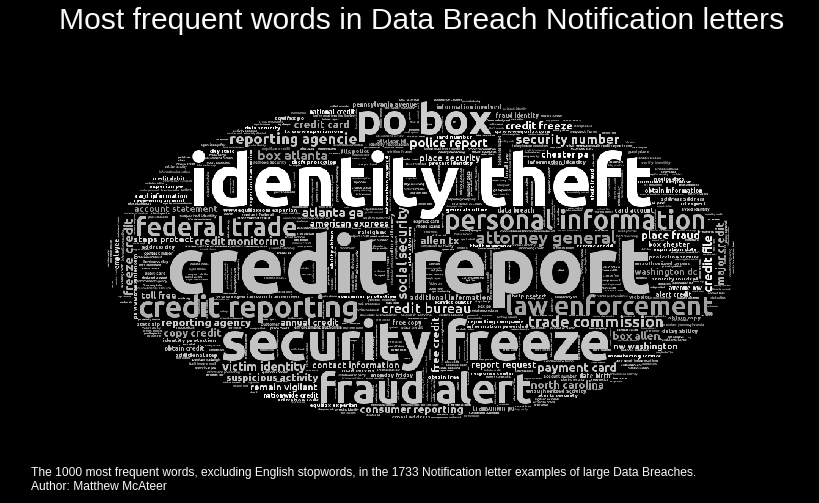

In [34]:
# Plotting the Word Cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud.recolor(color_func=grey_color, random_state=3))
plt.title(title, color=fontcolor, size=30, y=1.01)
plt.annotate(footer, xy=(0, -.025), xycoords='axes fraction', fontsize=infosize, color=fontcolor)
plt.axis('off')
plt.show()